<a href="https://colab.research.google.com/github/ankitzp8/Mobile_Price_Range_Prediction/blob/main/Mobile_Price_Range_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement:**

### In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.

### The objective is to find out some relation between features of a mobile phone(e.g:- RAM, Internal Memory etc) and its selling price. **In this problem, we do not have to predict the actual price but a price range indicating how high the price is.**

## **What is a mobile phone?**

#### Mobile phone, cellular phone, cellphone, sometimes shortened to simply mobile, cell or just phone is a portable telephone that can make and receive calls over a radio frequency link while the user is moving within a telephone service area.

#### Mobile phones, particularly the smartphones that have become our inseparable companions today, are relatively new.

#### However, the history of mobile phones goes back to 1908 when a US Patent was issued in Kentucky for a wireless telephone. Mobile phones were invented as early as the 1940s when engineers working at AT&T developed cells for mobile phone base stations.

#### The very first mobile phones were not really mobile phones at all. They were two-way radios that allowed people like taxi drivers and the emergency services to communicate. Instead of relying on base stations with separate cells (and the signal being passed from one cell to another), the first mobile phone networks involved one very powerful base station covering a much wider area.

#### Motorola, on 3 April 1973 were the first company to mass produce the first handheld mobile phone. These early mobile phones are often referred to as 0G mobile phones, or Zero Generation mobile phones. Most phones today rely on 3G or 4G mobile technology.

## **Why mobile price prediction is important for businesses?**

#### Mobile phones come in all sorts of prices, features, specifications. Price estimation and prediction is an important part of consumer strategy. Deciding on the correct price of a product is very important for the market success of a product. A new product that has to be launched, must have the correct price so that the consumers find it appropriate to buy the product.

#### This kind of prediction will help businesses estimate price of mobiles accurately to give good competition to other manufacturers and place their own product in the correct segment.

## **Data Description:**

#### **Battery_power:** Total energy a battery can store in one time measured in mAh

#### **Blue:** Has bluetooth or not

#### **Clock_speed:** Speed at which microprocessor executes instructions

#### **Dual_sim:** Has dual sim support or not

#### **Fc:** Front camera mega pixels

#### **Four_g:** Has 4G or not

#### **Int_memory:** Internal memory in gigabytes

#### **M_dep:** Mobile depth in cm

#### **Mobile_wt:** Weight of mobile phone

#### **N_cores:** Number of cores of processor

#### **Pc:** Primary camera mega pixels

#### **Px_height:** Pixel resolution height

#### **Px_width:** Pixel resolution width

#### **Ram:** Random Access Memory in Megabytes

#### **Sc_h:** Screen height of mobile in cm

#### **Sc_w:** Screen width of mobile in cm

#### **Talk_time:** Longest time that a single battery charge will last when you are talking over phone

#### **Three_g:** Has 3G or not

#### **Touch_screen:** Has touch screen or not

#### **Wifi:** Has wifi or not

#### **Price_range:** This is the target variable with value of **0(low cost)**, **1(medium cost)**, **2(high cost)** and **3(very high cost)**.

## **Import the libraries and the dataset to understand the variables present:**

In [3]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = [13,7]
sns.set(rc={'figure.figsize':(13,7)})

In [2]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
# loading the data
phone_df = pd.read_csv("/content/drive/MyDrive/Mobile-Price-Range-Prediction/data_mobile_price_range.csv")
phone_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# last 5 rows of the data
phone_df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
# number of records present
len(phone_df)

2000

In [ ]:
# shape of the dataset
phone_df.shape

(2000, 21)

In [ ]:
# columns in the dataset
phone_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

* There are 21 columns in the dataset including the target variable.

* There are a total of 2000 records of mobile phone data in our dataset.

In [ ]:
# check datatypes of the features
phone_df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

## **Data Summary:**

## **Information/Description of the Data:**

In [ ]:
# check information of the dataset
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
# description of the dataset
phone_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


* The dataset doesn't contain any null values as per the info() tells us but we can see some anomalies like minimum of px_height and sc_w is zero which cannot be true.

* The pixel resolution and screen width cannot be zero in any mobile phone so we will have to remove the data which contains these zero values.

---



## **Handling duplicates and missing values in the dataset:**

#### When using data, most people agree that your insights and analysis are only as good as the data you are using. Essentially, garbage data in is garbage analysis out. Data cleaning, also referred to as data cleansing and data scrubbing, is one of the most important steps in data analysis.

#### Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. When combining multiple data sources, there are many opportunities for data to be duplicated or mislabeled. If data is incorrect, outcomes and algorithms are unreliable, even though they may look correct. There is no one absolute way to prescribe the exact steps in the data cleaning process because the processes will vary from dataset to dataset.

#### Missing or duplicate data may exist in a dataset for a number of different reasons. Sometimes, missing or duplicate data is introduced as we perform cleaning and transformation tasks such as combining data, reindexing data, and reshaping data. Other times, it exists in the original dataset for reasons such as user input error or data storage or conversion issues.

#### In the case of missing values, they may also exist in the original dataset to purposely indicate that data is unavailable.

#### **Why do we need to fill in the missing data?**

#### Because most of the machine learning models that we want to use will provide an error if we pass NaN values into it. The easiest way is to just fill them up with 0, but this can reduce our model accuracy significantly. For filling up missing values, there are many methods available but for choosing the best method, we need to understand the type of missing value and its significance, before we start handling those missing values.

In [ ]:
# check for missing values
phone_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
# check for duplicated records
phone_df.duplicated().sum()

0

* The dataset is almost a clean one with no null values or duplicate records.

* We will remove the data where the pixel resolution height and screen width contains zero value.

In [ ]:
# remove zero values of pixel resolution height and screen width
phone_df = phone_df[phone_df['sc_w'] != 0]
phone_df = phone_df[phone_df['px_height'] != 0]
phone_df.shape

(1819, 21)

In [ ]:
# let's check the description of the data again
phone_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000
mean,1238.031336,0.503573,1.519406,0.504673,4.319956,0.524464,32.156130,0.499835,140.578340,4.531061,9.882353,647.086861,1252.828477,2133.468939,12.488730,6.338098,11.009346,0.760858,0.507422,0.513469,1.509621
std,439.989288,0.500125,0.813975,0.500116,4.355982,0.499538,18.105723,0.288875,35.437231,2.288705,6.009473,444.741154,432.418889,1087.488721,4.166008,4.153085,5.456642,0.426677,0.500082,0.499956,1.119529
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,1.000000,500.000000,256.000000,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,845.000000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,284.000000,877.000000,1203.500000,9.000000,3.000000,6.000000,1.000000,0.000000,0.000000,1.000000
50%,1231.000000,1.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,5.000000,10.000000,562.000000,1251.000000,2175.000000,13.000000,6.000000,11.000000,1.000000,1.000000,1.000000,2.000000
75%,1611.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.500000,7.000000,15.000000,952.000000,1633.000000,3072.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,3.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


* Now, we have successfully removed the abnormal values and we are left with 1819 records which are clean ones.

## **Exploratory Data Analysis:**

#### Exploratory Data Analysis or EDA is used to take insights from the data. Data Scientists and Analysts try to find different patterns, relations, and anomalies in the data using some statistical graphs and other visualization techniques.


#### The main purpose of EDA is to detect any errors, outliers as well as to understand different patterns in the data. It allows Analysts to understand the data better before making any assumptions.

#### We will be doing some univariate, bivariate and multivariate analysis to discover some insights from the data like:

  * Distribution of the target variable to check whether the classes are balanced or imbalanced.

  * Countplots for each categorical feature to check the distribution of the categorical variables.

  * Distribution of the numerical features.

  * How categorical and numerical features vary with different price ranges?

  * How different combinations of number of cores, battery power and RAM vary with different price ranges?

In [ ]:
# define the categorical and numerical features separately
cat_features = ['blue','dual_sim','four_g','three_g','touch_screen','wifi']
num_features = ['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','talk_time','sc_h','sc_w']

### **Let us check the distribution of the target variable:**

In [ ]:
# value counts for each class in price range
phone_df['price_range'].value_counts()

3    461
2    456
1    451
0    451
Name: price_range, dtype: int64

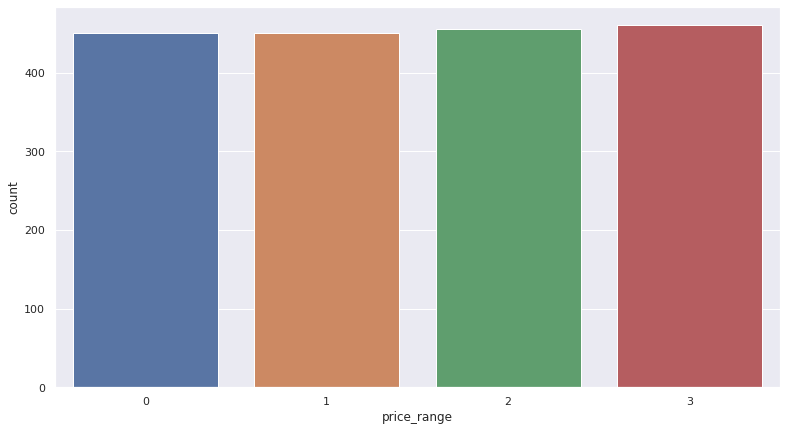

In [ ]:
# check the distribution of the price range
sns.countplot(phone_df['price_range'])
plt.show()

* We can observe from the plot above that our classes in the target variable are almost balanced. There isn't much difference between the classes (0,1,2,3).

### **Let us check the distribution of the categorical features:**

In [ ]:
# value counts for each categorical feature
print('Bluetooth\n', phone_df['blue'].value_counts())
print('Dual Sim\n', phone_df['dual_sim'].value_counts())
print('4G\n', phone_df['four_g'].value_counts())
print('3G\n', phone_df['three_g'].value_counts())
print('Touch Screen\n', phone_df['touch_screen'].value_counts())
print('Wifi\n', phone_df['wifi'].value_counts())

Bluetooth
 1    916
0    903
Name: blue, dtype: int64
Dual Sim
 1    918
0    901
Name: dual_sim, dtype: int64
4G
 1    954
0    865
Name: four_g, dtype: int64
3G
 1    1384
0     435
Name: three_g, dtype: int64
Touch Screen
 1    923
0    896
Name: touch_screen, dtype: int64
Wifi
 1    934
0    885
Name: wifi, dtype: int64


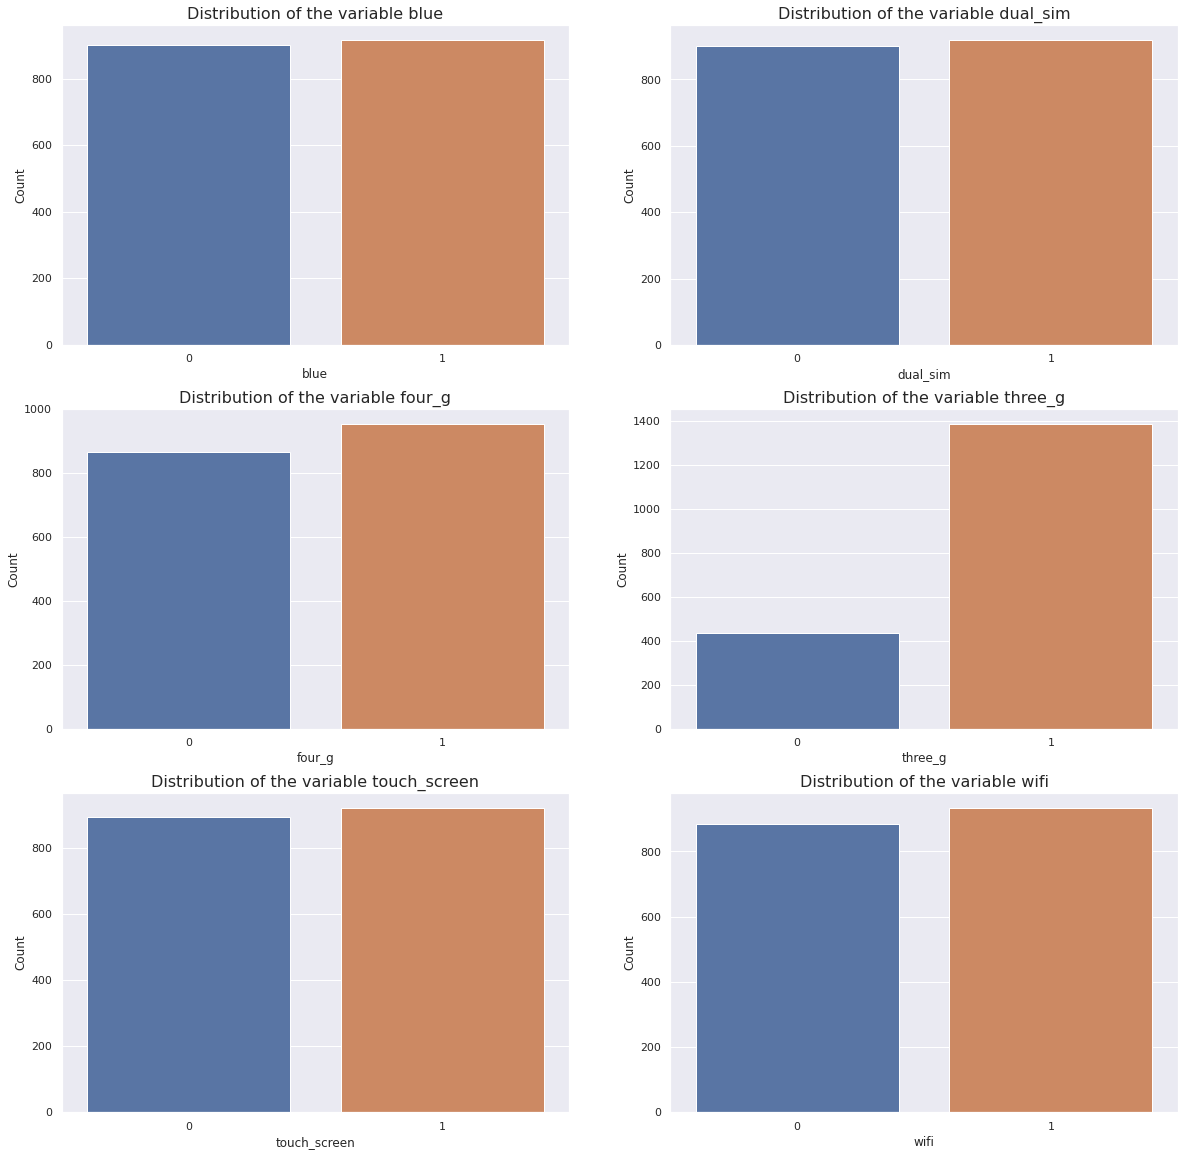

In [ ]:
# plot the distribution of the categorical features
count = 1
plt.subplots(figsize=(20,20))
for feature in cat_features:
  plt.subplot(3,2,count)
  sns.countplot(phone_df[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Count")
  count += 1

* From the plots above we can see that most of the categorical features have a similar distribution except the feature 'three_g' where there are very few mobiles which doesn't support 3G. Almost all phones have 3G network access if not 4G.

### **Let us now check the distribution of the numerical features:**

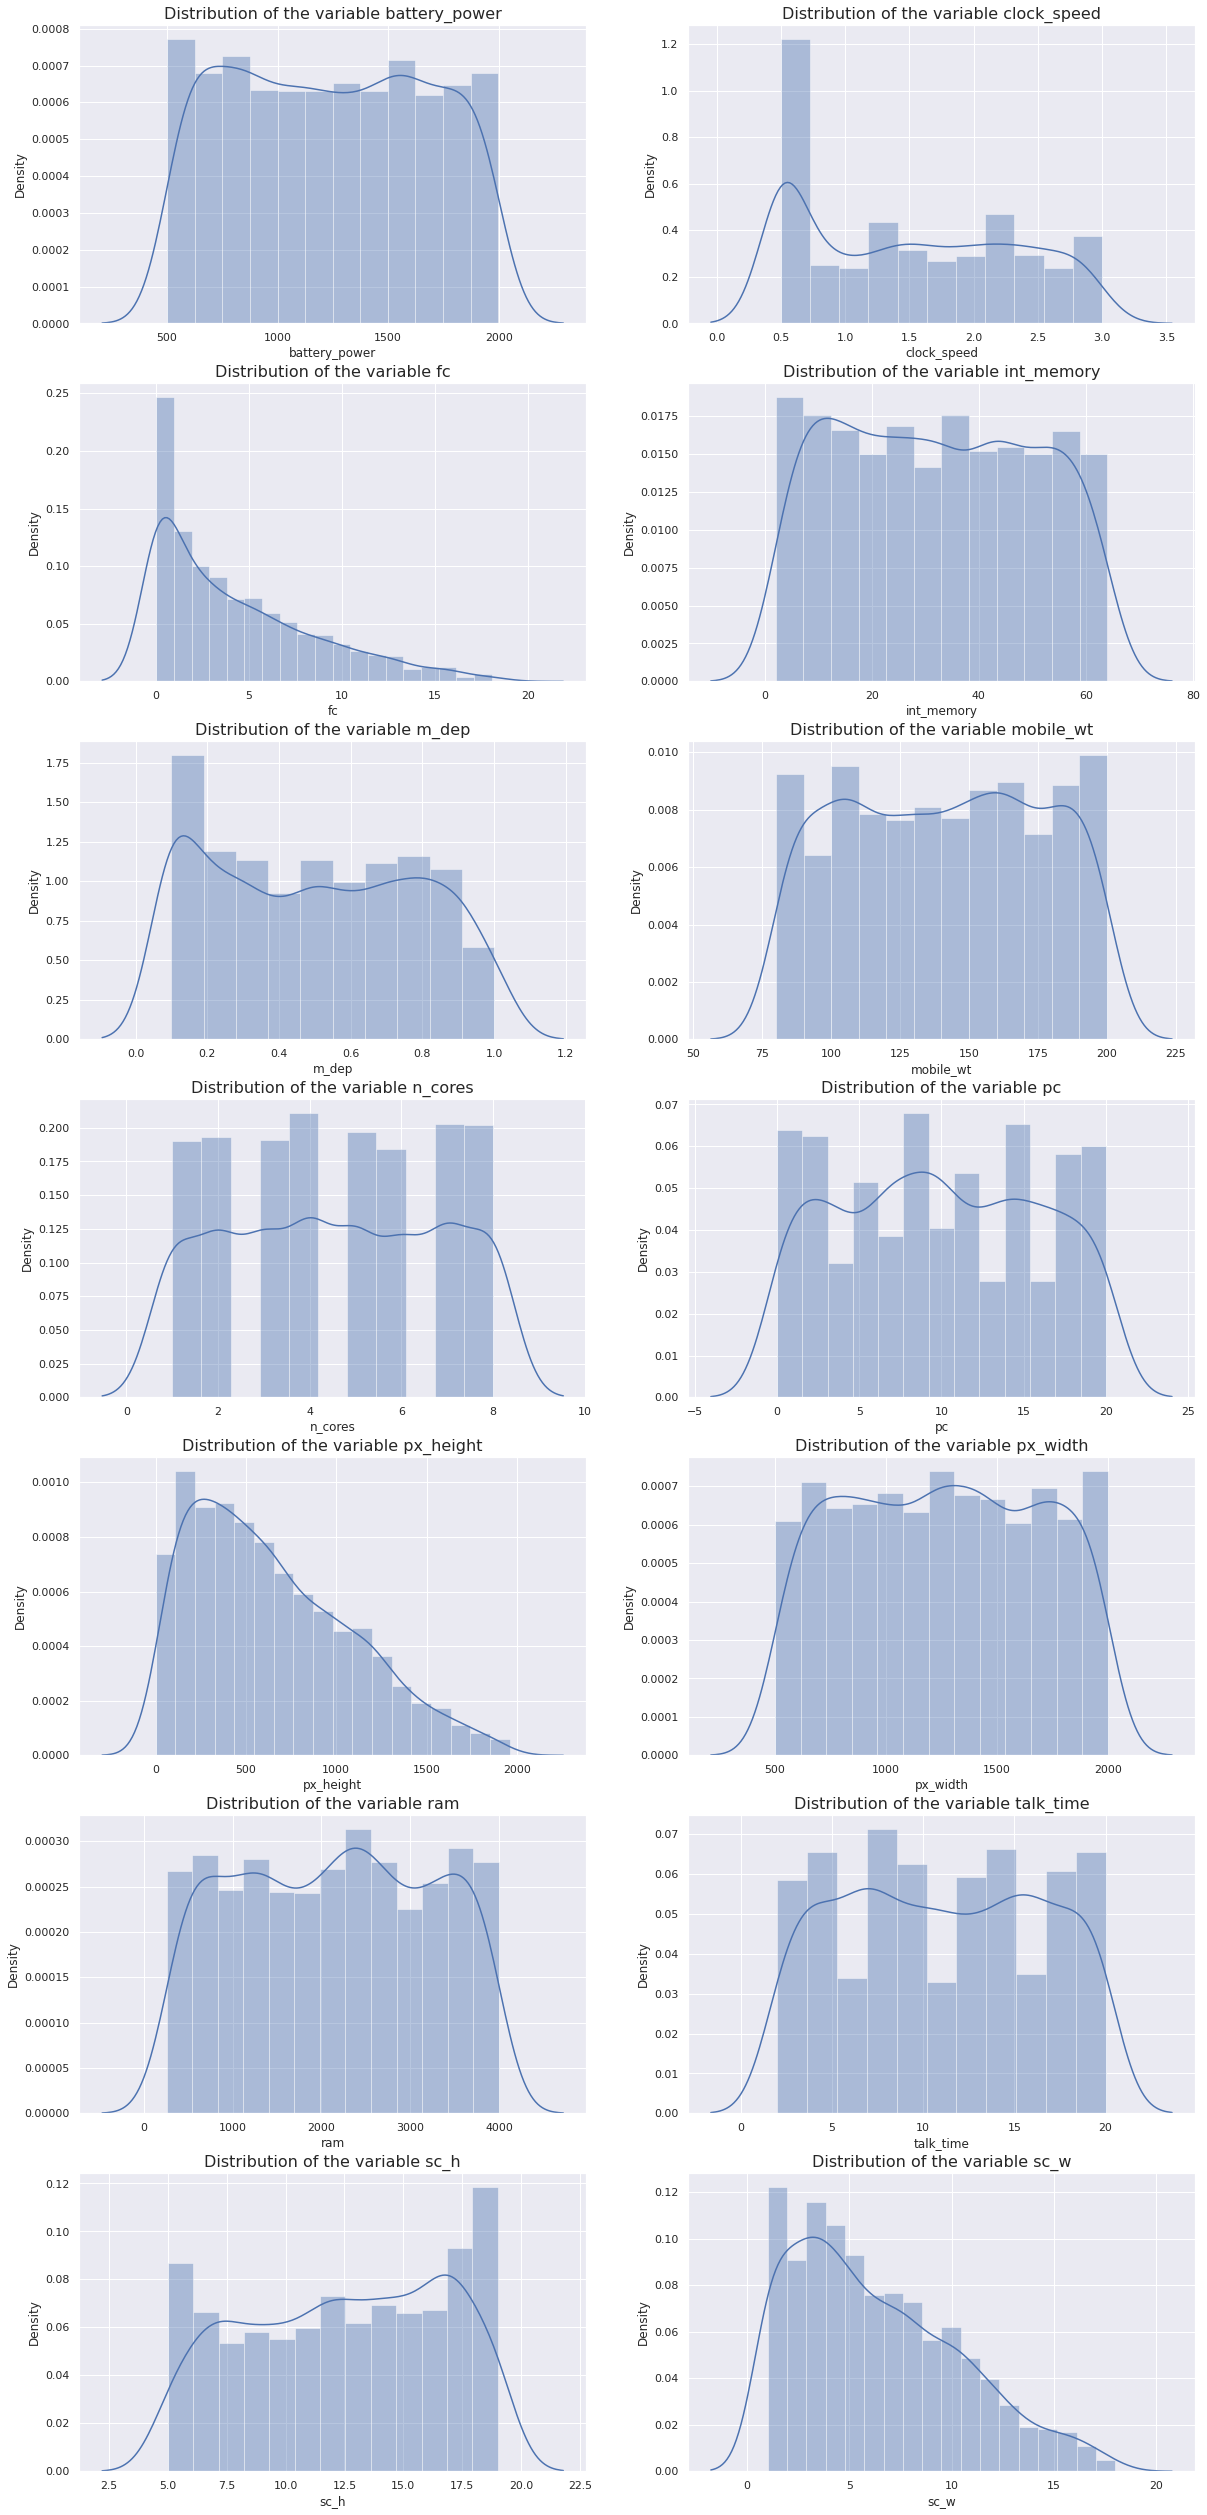

In [ ]:
# plot the distribution of the numerical features
count = 1
plt.subplots(figsize=(20,45))
for feature in num_features:
  plt.subplot(7,2,count)
  sns.distplot(phone_df[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

From the plots above we can conclude that,

* Many features have an almost uniform distribution which means there are products available almost equally in all sizes/values.

* Few features like fc, px_height and sc_w are right skewed means there are more number of products listed with the lesser size/value available.

### **Let us check the outliers for the numerical features:**

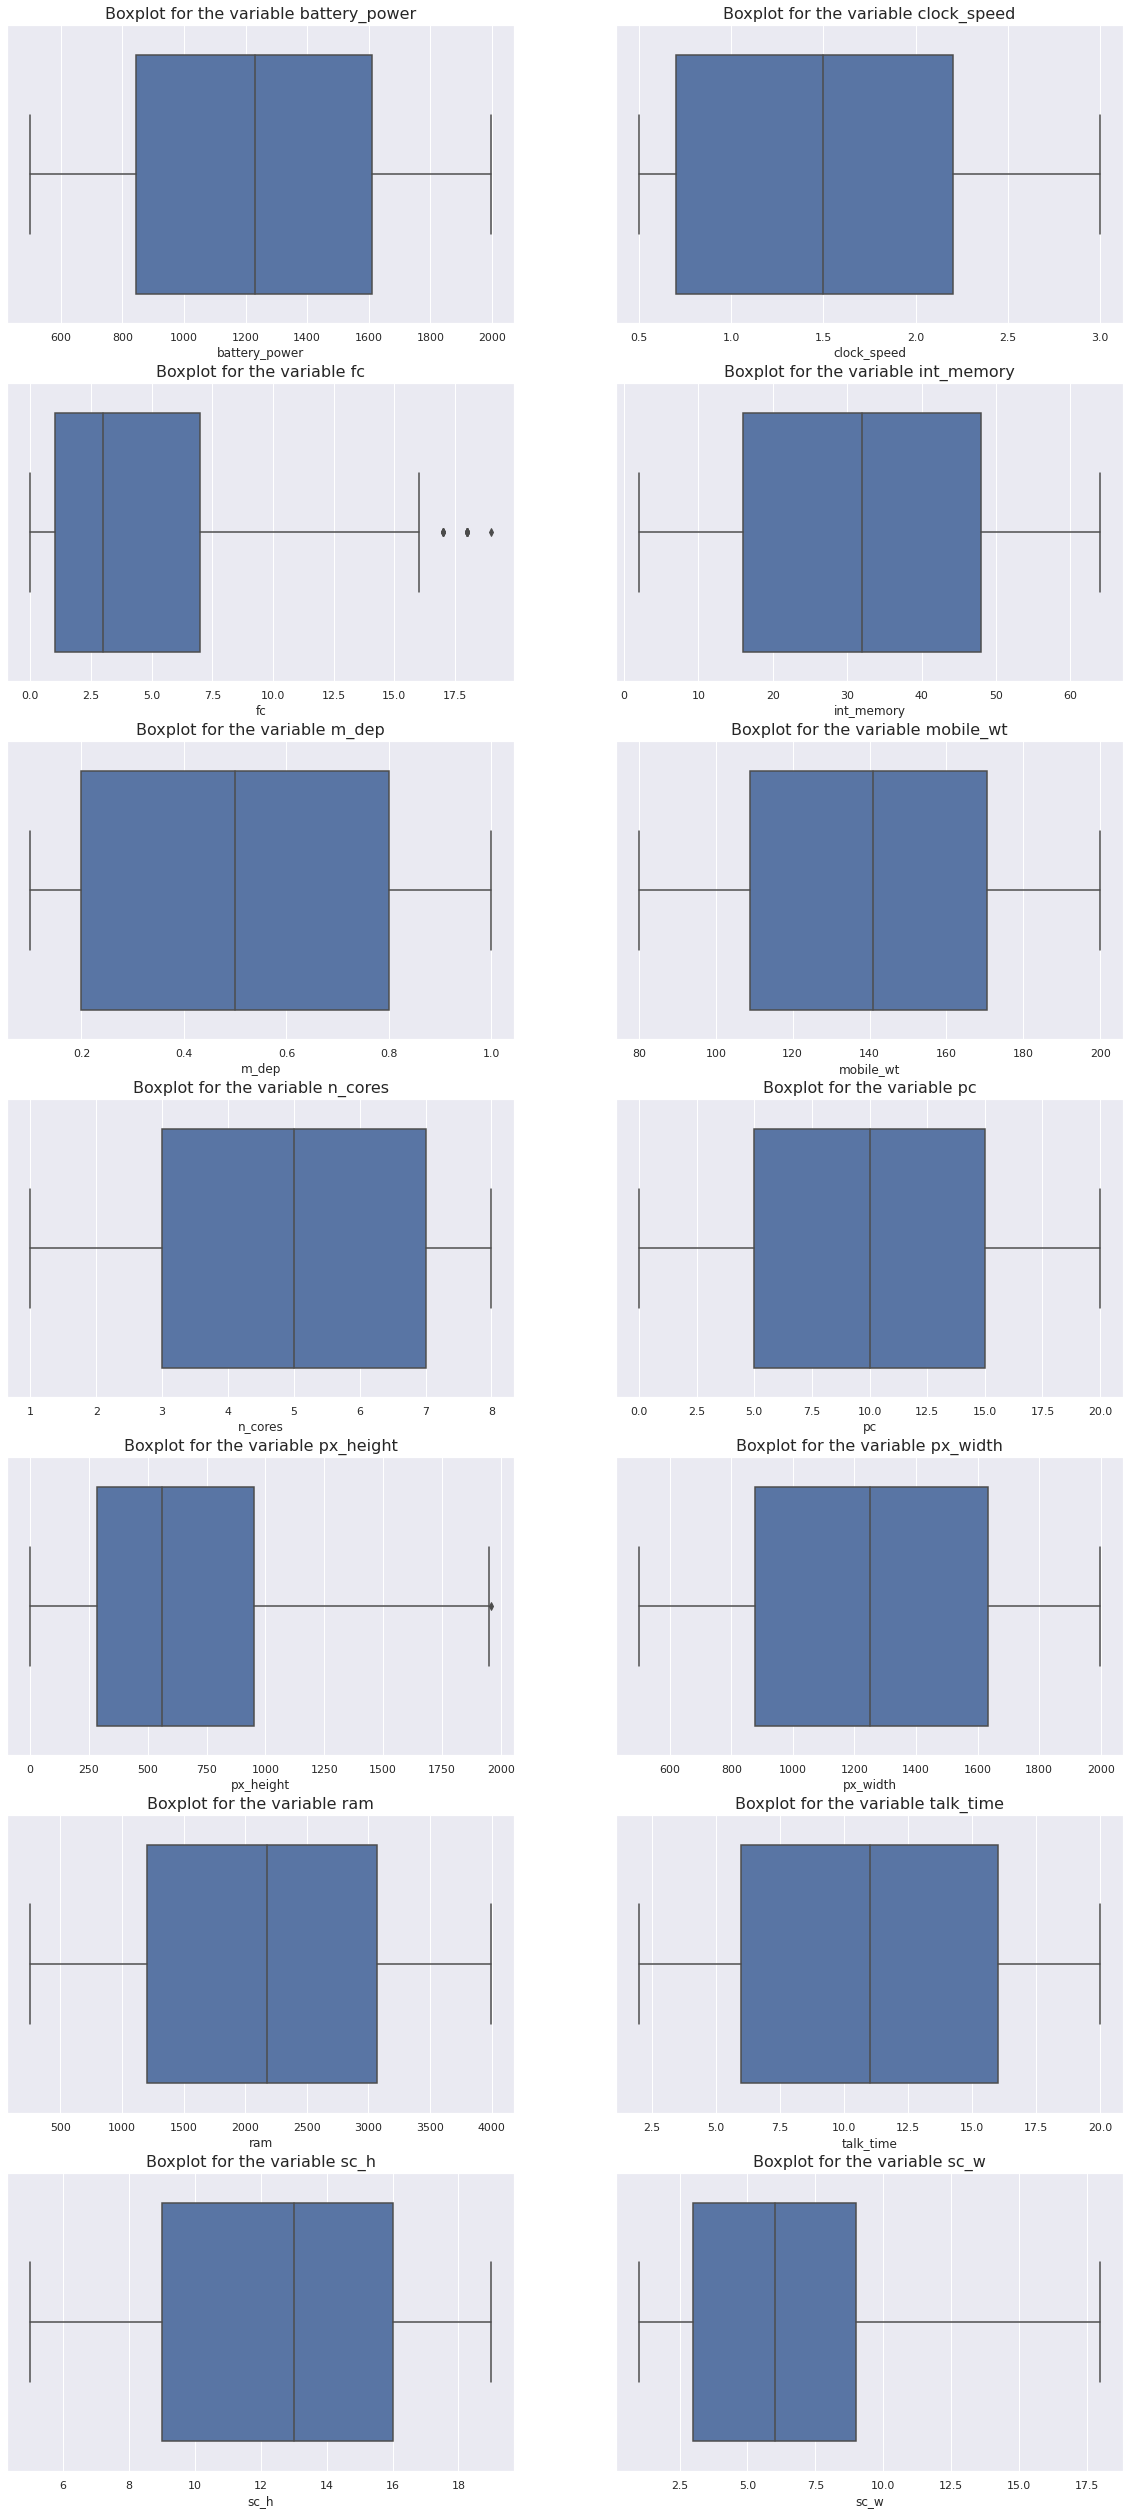

In [ ]:
# plot the boxplots of the numerical features
count = 1
plt.subplots(figsize=(20,45))
for feature in num_features:
  plt.subplot(7,2,count)
  sns.boxplot(phone_df[feature])
  plt.title(f"Boxplot for the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  count += 1

* The boxplots suggest us that there are outliers in fc and px_height but we won't treat any value as outlier here because these values are possible realistically to have in different kinds of mobiles available in the market.

* We know that there are phones which have 20MP or more as front camera so it is possible to have values upto 17.5MP as front camera.

* We have even seen that there are big sized mobile phones which require more resolution available having 4K, pure HD screens etc.

### **Let us now check how each categorical feature vary with different price ranges?**

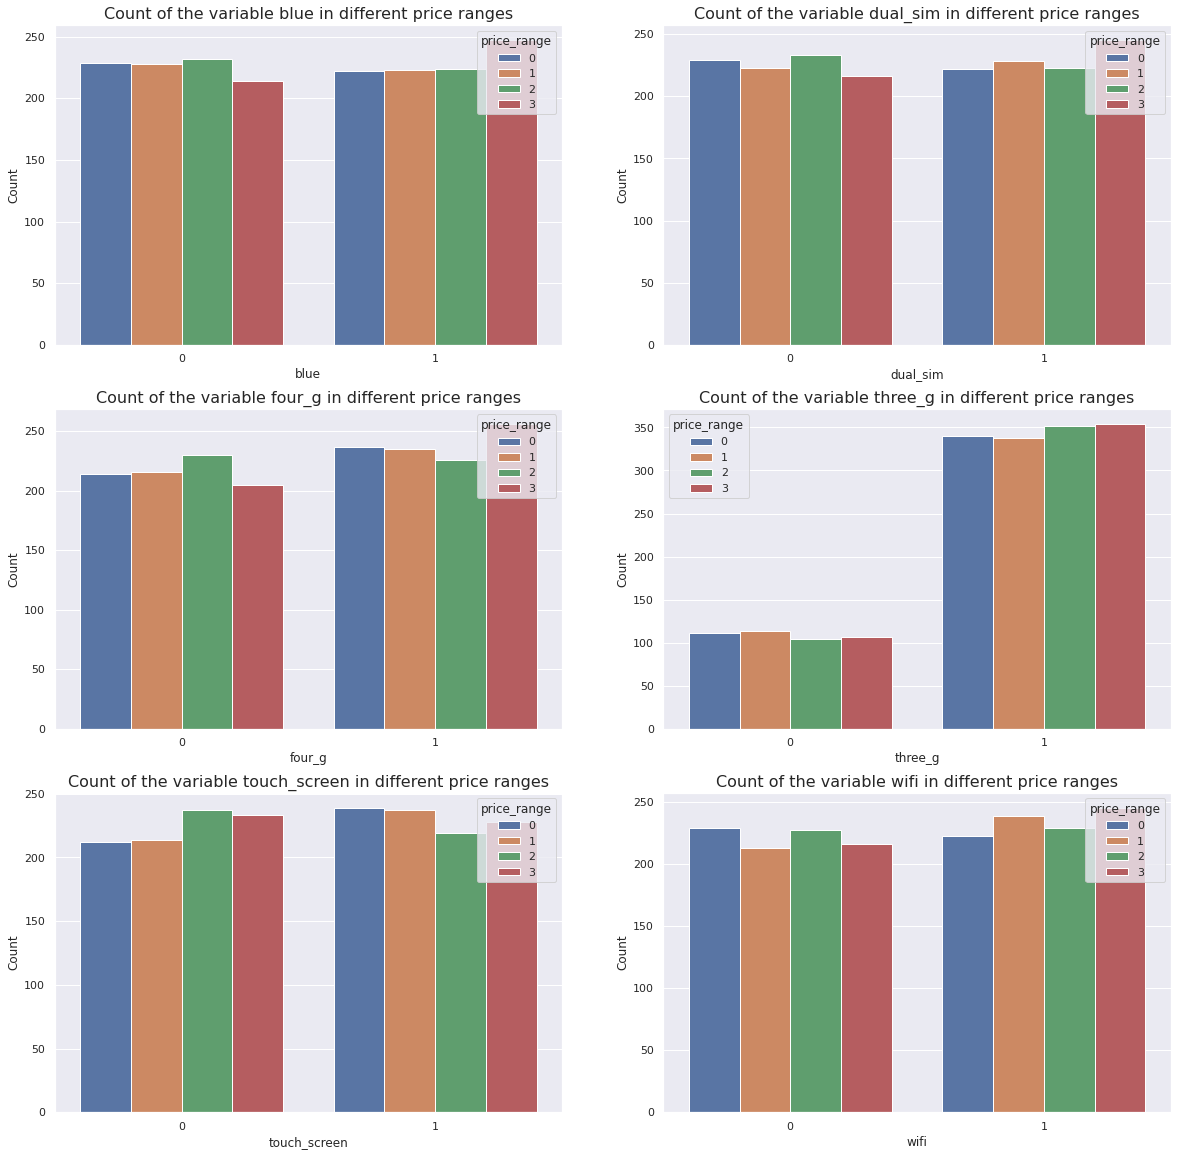

In [ ]:
# plot the count of categorical features for different price range
count = 1
plt.subplots(figsize=(20,20))
for feature in cat_features:
  plt.subplot(3,2,count)
  sns.countplot(phone_df[feature], hue=phone_df['price_range'])
  plt.title(f"Count of the variable {feature} in different price ranges", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Count")
  count += 1

From the above plots we can conclude that,

* All the variables has similar count of data for each class except the variable 'three_g' where there are very few number of mobiles which doesn't support 3G across all the price ranges.

* We can see all the features has similar number of mobiles available across all price ranges but if we look closely there are more number of mobiles available with the feature present in very high cost category across all the features except touch_screen feature.

* There are more number of mobiles present with touch screen in the low cost and medium cost category than other price categories.

* The more we pay for the more choices we get for buying a mobile which is present with all the features listed above.

### **Let us now check how each numerical feature vary with different price ranges?**

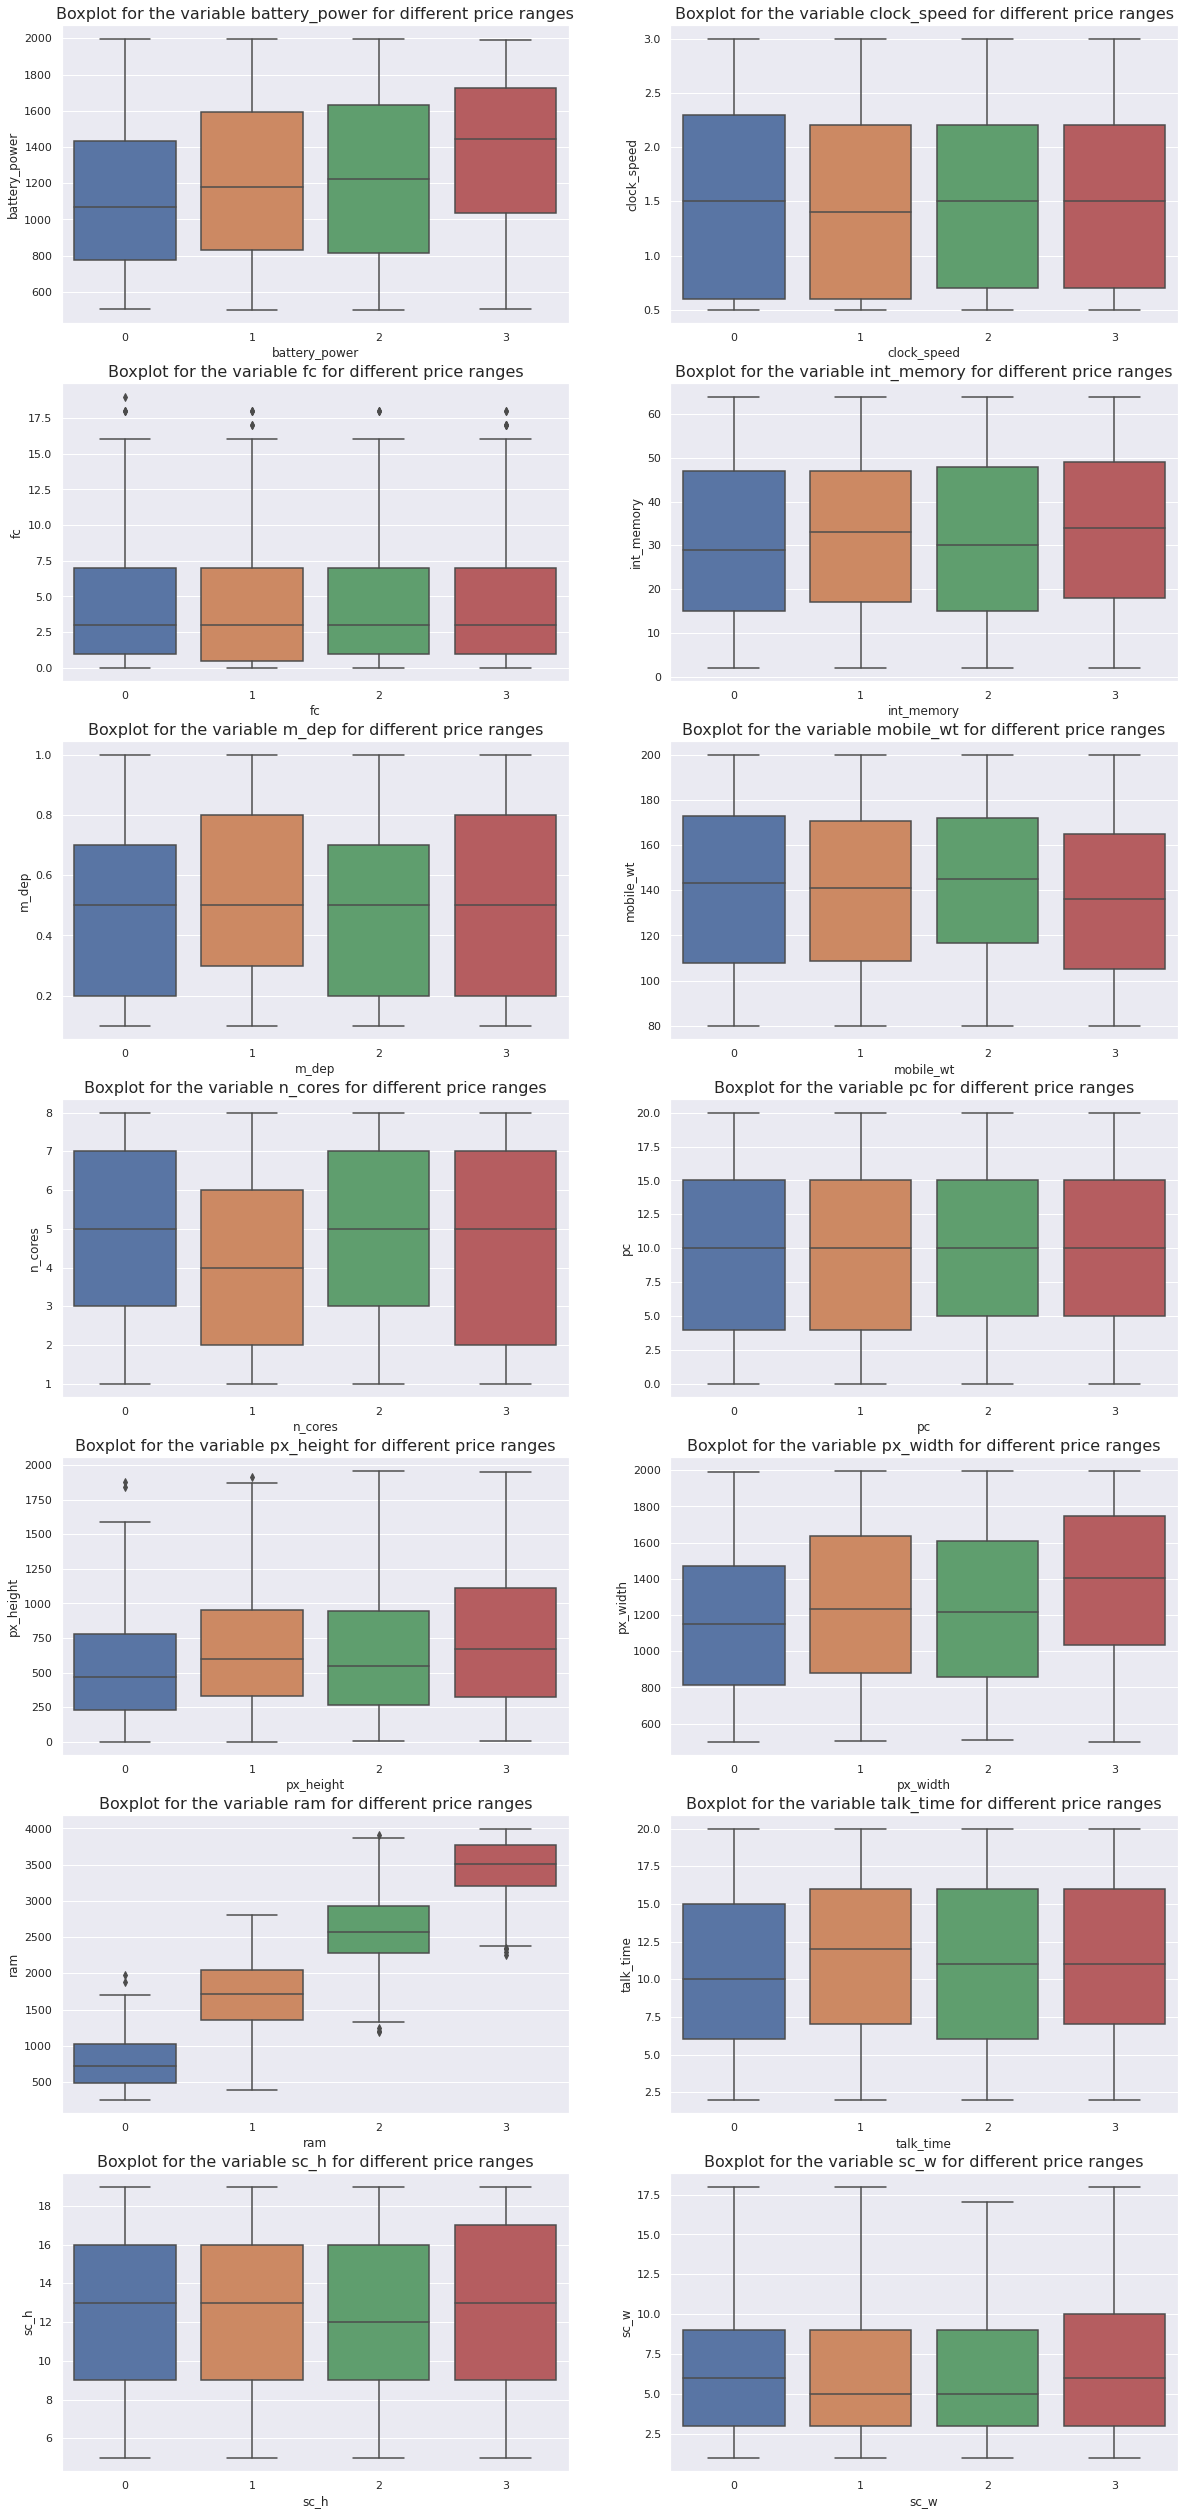

In [ ]:
# plot the boxplots of the numerical features
count = 1
plt.subplots(figsize=(20,45))
for feature in num_features:
  plt.subplot(7,2,count)
  sns.boxplot(y=phone_df[feature], x=phone_df['price_range'])
  plt.title(f"Boxplot for the variable {feature} for different price ranges", fontsize=16)
  plt.xlabel(f"{feature}")
  count += 1

From the above plots we can conclude that,

* Battery power is linearly related to price as price increases with battery power.

* Clock speed isn't linearly related as it doesn't increase with price range. We have more choices available for better clock speed in low cost category.

* Front camera remains the same across all the price ranges. The price range doesn't depend much on the front camera.

* Internal memory even remains the same across all the price ranges except for slight changes.

* There are more number of mobile phones available with more depth in the medium cost and very high cost category as compared to other price categories.

* We can get more number of mobile phones with less weight in the very high cost category.

* The median value of n_cores is more in the low cost and high cost category but we have more options to choose n_cores from in the very high cost category.

* Primary camera remains the same across all the price ranges.

* Pixel height and width increase slightly for the very high cost category which means you get more pixel resolution in the very high cost category.

* Price is linearly related to RAM as it increases with RAM. There is a good  difference in RAM between each of the price ranges. RAM is going to be an influential factor in predicting the mobile price ranges.

* The median value for talk time and screen size (i.e, sc_h and sc_w) remains almost the same across all the price categories. Thus the price doesn't depend much on these two features.

* Any feature which is increasing or decreasing with price will contribute a lot towards the mobile price prediction.

### **Let us find out how number of cores and battery power vary with price range?**

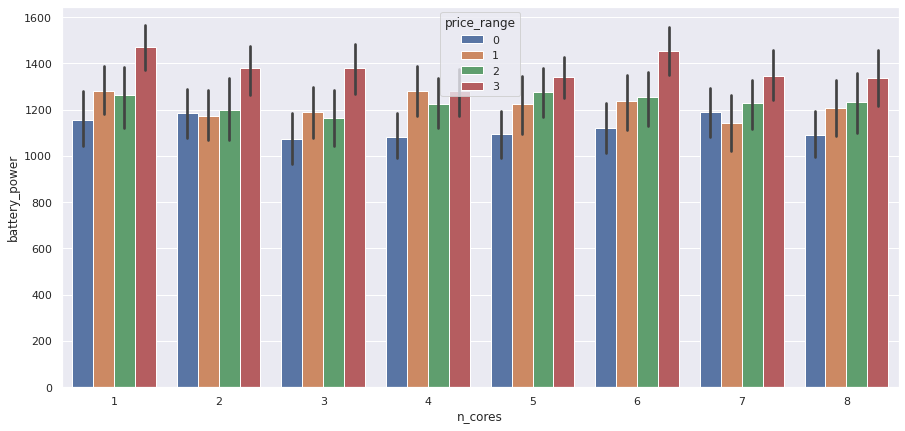

In [ ]:
# plot n_cores and battery_power with price ranges
plt.figure(figsize=(15,7))
sns.barplot(x='n_cores', y='battery_power', hue='price_range', data=phone_df)
plt.show()

* For every different core, we get the maximum battery power in the very high cost category of mobile phones.

* For every number of cores available, we have the option to choose from any price category.

* On an average 1, 4 and 6 cores has the most battery power available across all price ranges.

### **Let us find out how number of cores and RAM vary with different price ranges?**

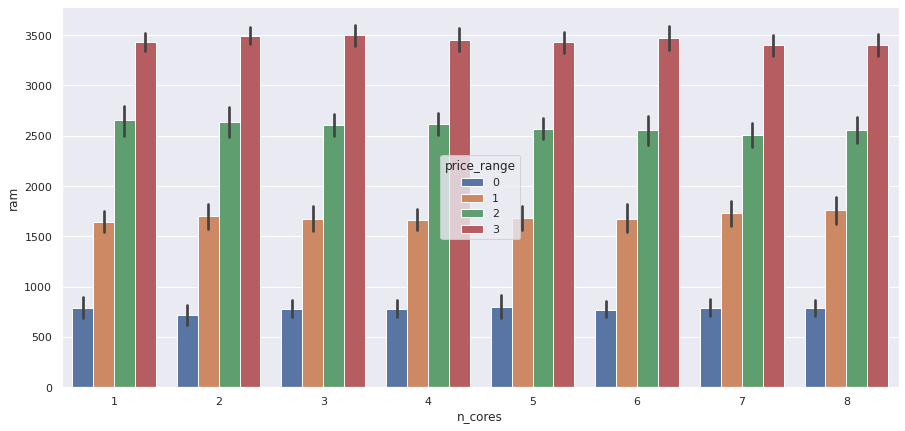

In [ ]:
# plot n_cores and ram with price ranges
plt.figure(figsize=(15,7))
sns.barplot(x='n_cores', y='ram', hue='price_range', data=phone_df)
plt.show()

* We can observe that for very high cost category we get the maximum RAM across all number of cores available.

* Hence, RAM is a strong predictor of the price range as we can see RAM increases with price for each number of cores available.

## **Correlation Analysis:**

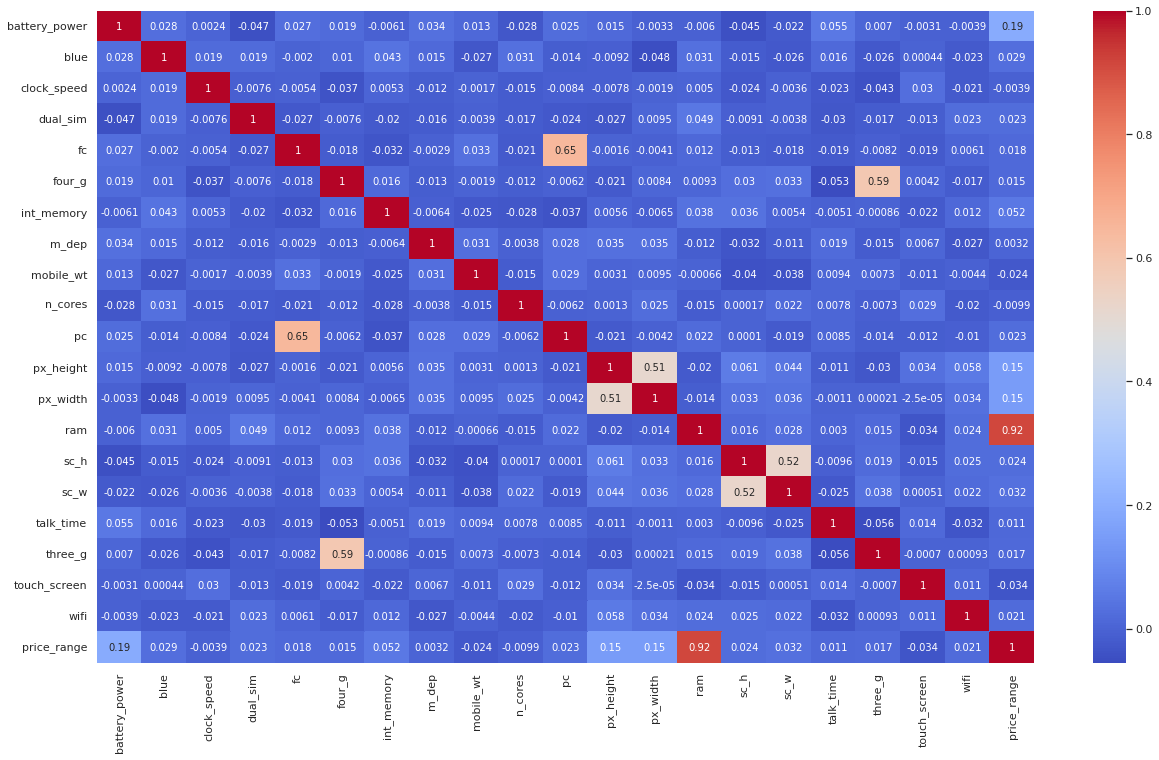

In [ ]:
# check correlation with a heatmap
plt.figure(figsize=(21,12))
sns.heatmap(phone_df.corr(), annot=True, cmap='coolwarm')
plt.show()

From the correlation plot above we can observe that,

* RAM is the only feature strongly correlated with the target variable which means RAM is a strong predictor for the price range variable.

* fc and pc are correlated with a value of 0.65 which is obvious as primary camera increases front camera also increases. We cannot combine these features as both of these are different parameters while buying a mobile.

* three_g and four_g are correlated with a value of 0.59 which is again obvious as whichever mobile supports 4G supports 3G too but not vice versa.

* Most of the independent variables are not strongly correlated to each other, hence we do not need to eliminate any feature.

### **Let us now check how the numerical features are correlated with the target variable:**

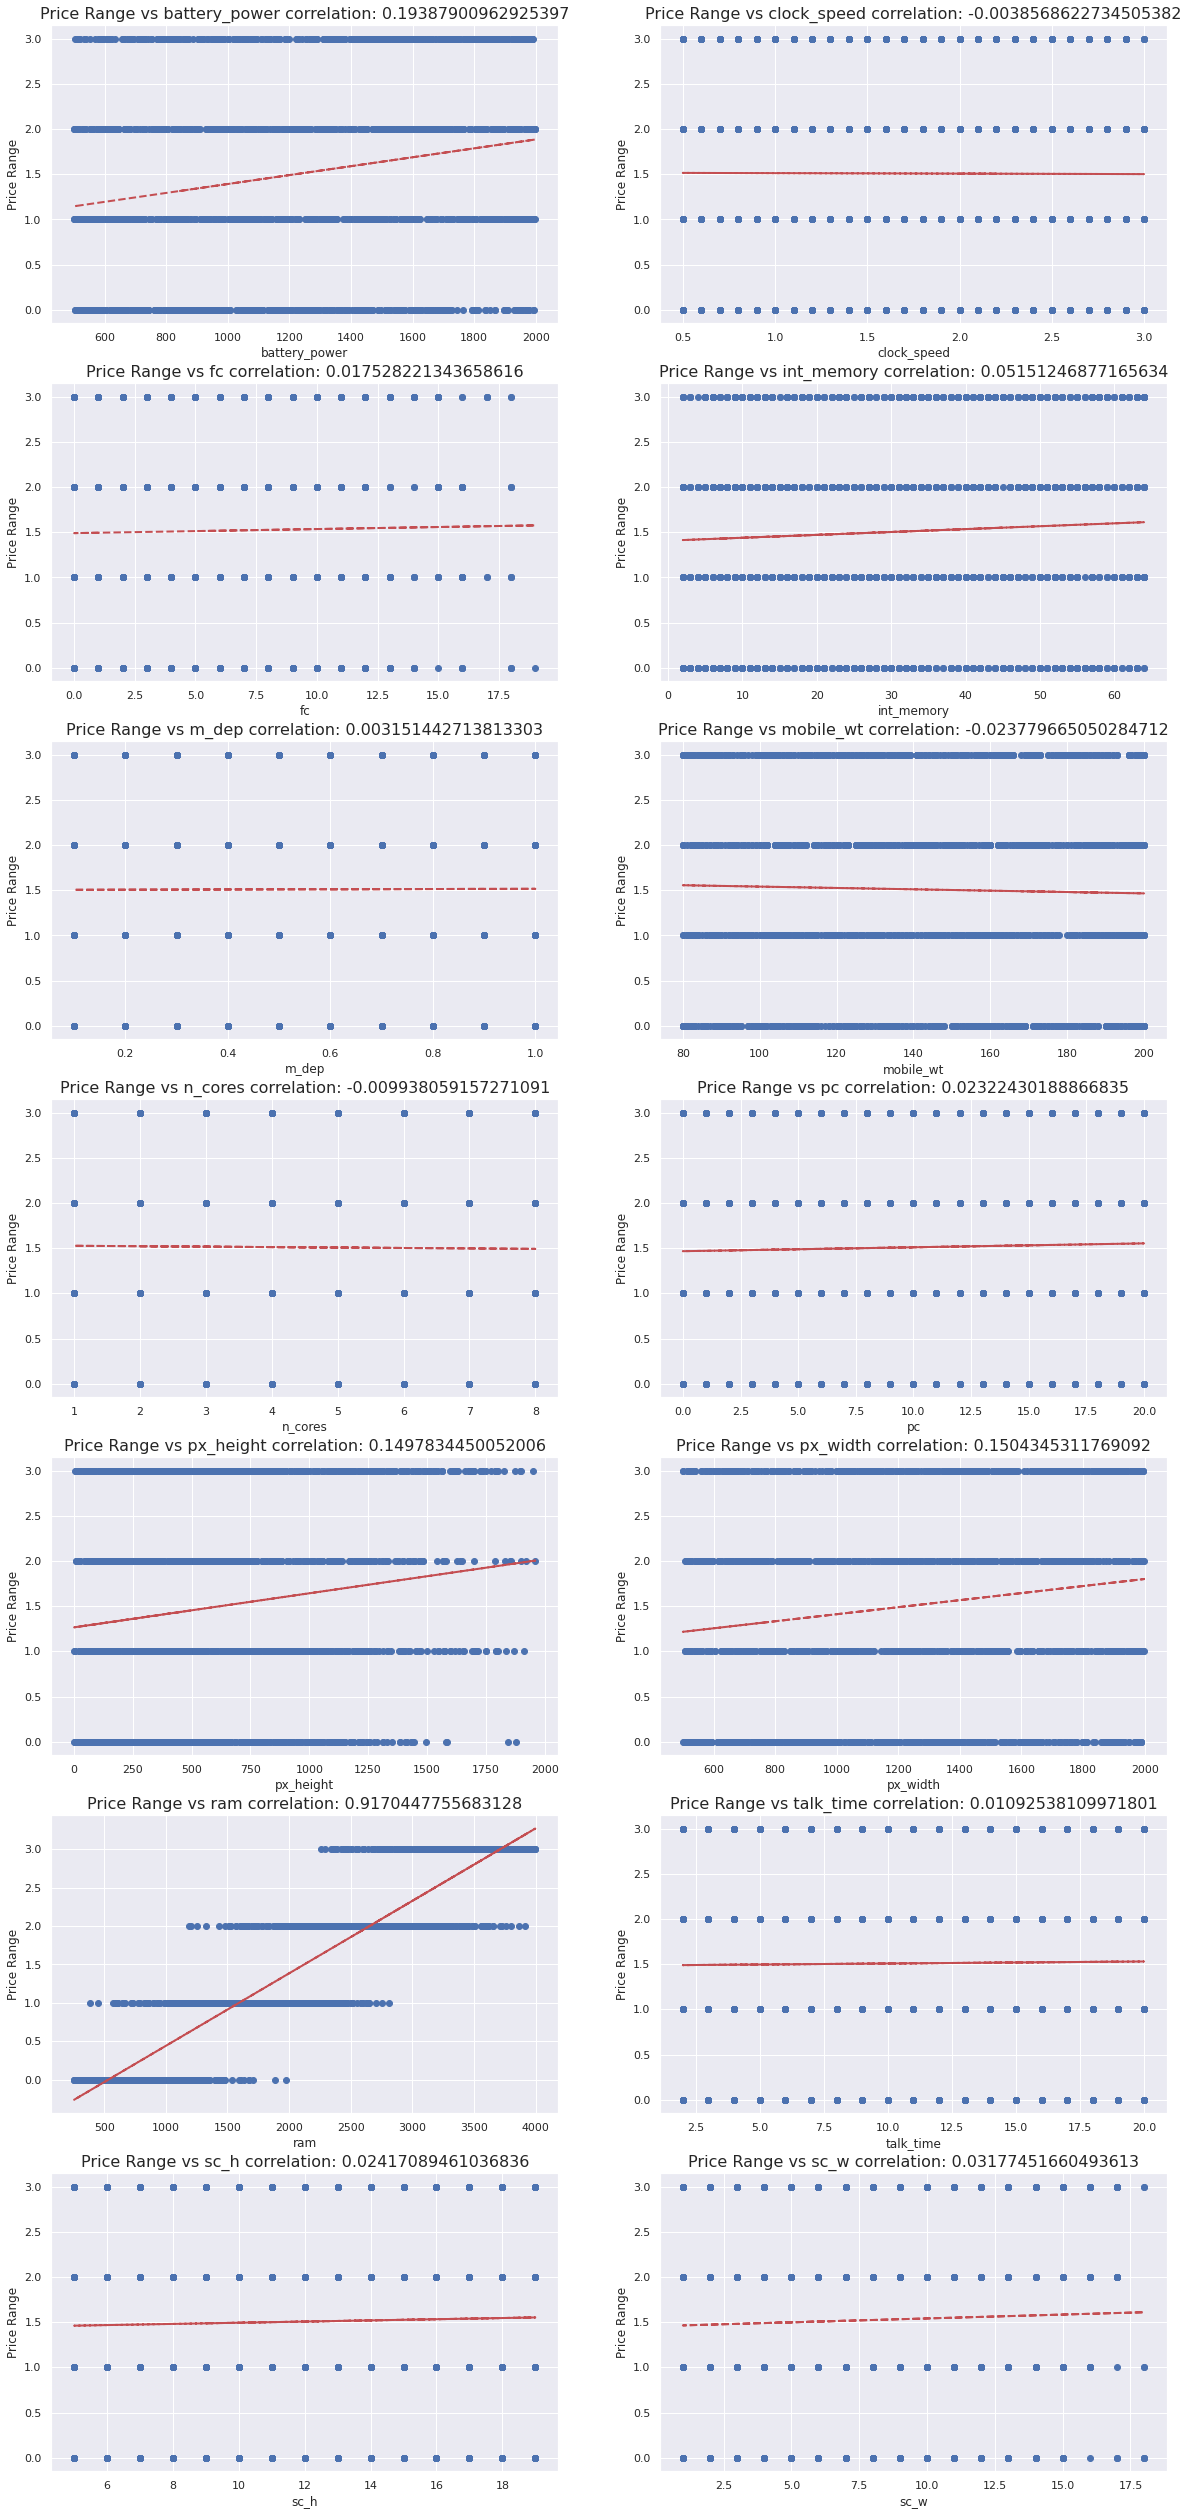

In [ ]:
# relation of numerical features with the target variable
count = 1
plt.subplots(figsize=(20,45))
for feature in num_features:
  plt.subplot(7,2,count)
  var = phone_df[feature]
  label = phone_df['price_range']
  correlation = var.corr(label)
  plt.scatter(x = var, y = label)
  plt.xlabel(feature)
  plt.ylabel('Price Range')
  plt.title(f"Price Range vs {feature} correlation: {correlation}", fontsize=16)
  z = np.polyfit(var, label, 1)
  y_hat = np.poly1d(z)(phone_df[feature])
  plt.plot(phone_df[feature], y_hat, "r--", lw=2)
  count += 1

From the correlation plots above we can see that,

* Only RAM is strongly correlated with the target variable. RAM will have a strong influence in determining the price ranges.

* Battery Power, px_height and px_width are slightly correlated with the target variable and rest all of the features are not correlated or have very low correlation with the target variable.

### **Let us now check how the categorical features are correlated with the target variable:**

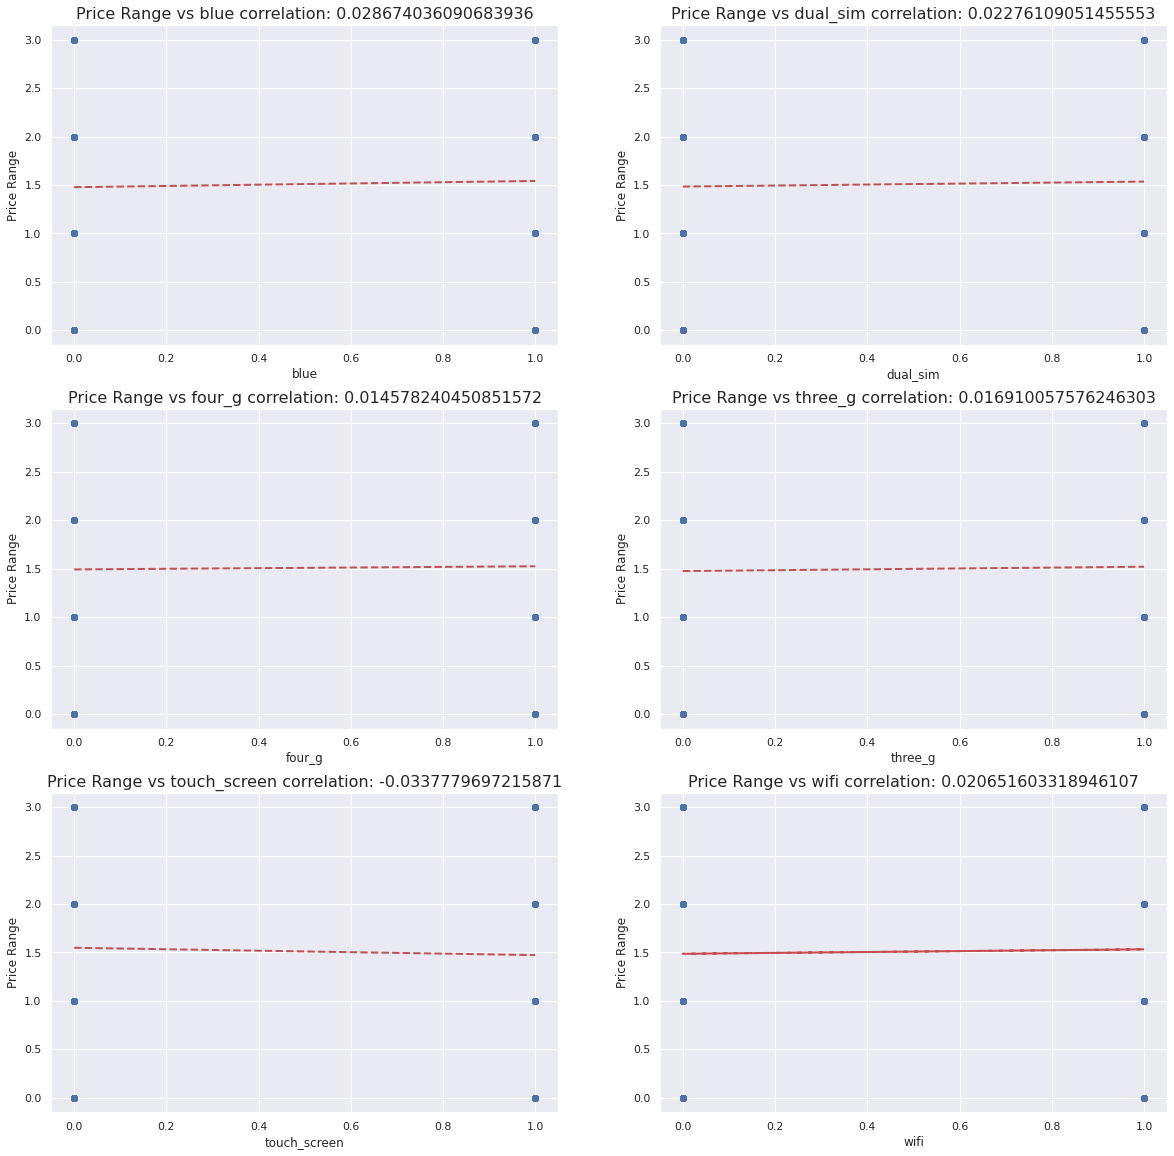

In [ ]:
# relation of categorical features with the target variable
count = 1
plt.subplots(figsize=(20,20))
for feature in cat_features:
  plt.subplot(3,2,count)
  var = phone_df[feature]
  label = phone_df['price_range']
  correlation = var.corr(label)
  plt.scatter(x = var, y = label)
  plt.xlabel(feature)
  plt.ylabel('Price Range')
  plt.title(f"Price Range vs {feature} correlation: {correlation}", fontsize=16)
  z = np.polyfit(var, label, 1)
  y_hat = np.poly1d(z)(phone_df[feature])
  plt.plot(phone_df[feature], y_hat, "r--", lw=2)
  count += 1

* From the correlation plots above, we can see that no categorical feature is strongly correlated with the target variable.

* All of the features have very low correlation with the target variable and interestingly touch_screen has a very low negative correlation with the target variable.

## **Data Preparation:**

In [ ]:
# create the set of dependent and independent variables
X = phone_df.drop(labels='price_range', axis=1)
Y = phone_df['price_range']

# print the shape of X and Y
print("The shape of X is", X.shape)
print("The shape of Y is", Y.shape)

The shape of X is (1819, 20)
The shape of Y is (1819,)


### **Let us define a function for confusion matrix:**

In [ ]:
# function for confusion matrix
def matrix(actual, predicted):
  labels = ['0','1','2','3']
  cm = confusion_matrix(actual, predicted)
  print(cm)

  ax = plt.subplot()
  sns.heatmap(cm, annot=True, ax=ax)

  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('Actual labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

## **Building a Logistic Regression Model:**

In [ ]:
# function for logistic regression
def logistic_regression(X,Y):

  # split the data into train and test set
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
  print("The shape of training set is", X_train.shape, Y_train.shape)
  print("The shape of testing set is", X_test.shape, Y_test.shape)

  # transforming the data
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  # build a logistic regression model
  log_reg = LogisticRegression(fit_intercept=True, max_iter=10000)
  log_reg.fit(X_train, Y_train)

  # get the predicted probabilities
  logistic_train_prob = log_reg.predict_proba(X_train)
  logistic_test_prob = log_reg.predict_proba(X_test)

  # get the predicted classes
  logistic_train_class = log_reg.predict(X_train)
  logistic_test_class = log_reg.predict(X_test)

  # calculating accuracy on train and test set
  logistic_train_acc = accuracy_score(Y_train, logistic_train_class)
  logistic_test_acc = accuracy_score(Y_test, logistic_test_class)

  print("\n")
  print("The accuracy on train dataset is", logistic_train_acc)
  print("The accuracy on test dataset is", logistic_test_acc)
  print("\n")

  # calculating precision and recall on the test set
  log_precision = precision_score(Y_test, logistic_test_class, average='weighted')
  print("The precision on test dataset is", log_precision)

  log_recall = recall_score(Y_test, logistic_test_class, average='weighted')
  print("The recall on test dataset is", log_recall)

  # calculating roc_auc_score on the test set
  log_roc = roc_auc_score(Y_test, logistic_test_prob, multi_class='ovo', average='weighted')
  print("The roc auc score on test dataset is", log_roc)

  # training confusion matrix
  print("\n")
  print("Confusion matrix for train set:")
  matrix(Y_train, logistic_train_class)
  plt.figure()
  plt.show()
  # testing confusion matrix
  print("\n")
  print("Confusion matrix for test set:")
  matrix(Y_test, logistic_test_class)
  plt.figure()
  plt.show()

  print("\n Classification report:")
  print(classification_report(Y_test, logistic_test_class))
  print("\n")

  # prediction in a dataframe
  pred = pd.DataFrame({'Actual Label': Y_test,
                       'Predicted Label': logistic_test_class})
  print("The top 5 rows of actual vs predicted labels\n", pred.head())

  return logistic_test_acc, log_precision, log_recall, log_roc

### **Evaluating the Model:**

The shape of training set is (1455, 20) (1455,)
The shape of testing set is (364, 20) (364,)


The accuracy on train dataset is 0.9759450171821306
The accuracy on test dataset is 0.9642857142857143


The precision on test dataset is 0.9644830914547854
The recall on test dataset is 0.9642857142857143
The roc auc score on test dataset is 0.9975461050065317


Confusion matrix for train set:
[[348   4   0   0]
 [  6 345   6   0]
 [  0   7 350  11]
 [  0   0   1 377]]


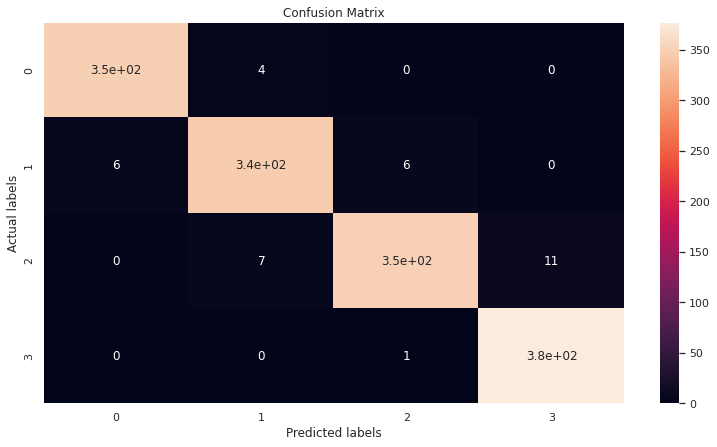

<Figure size 936x504 with 0 Axes>



Confusion matrix for test set:
[[99  0  0  0]
 [ 5 86  3  0]
 [ 0  3 84  1]
 [ 0  0  1 82]]


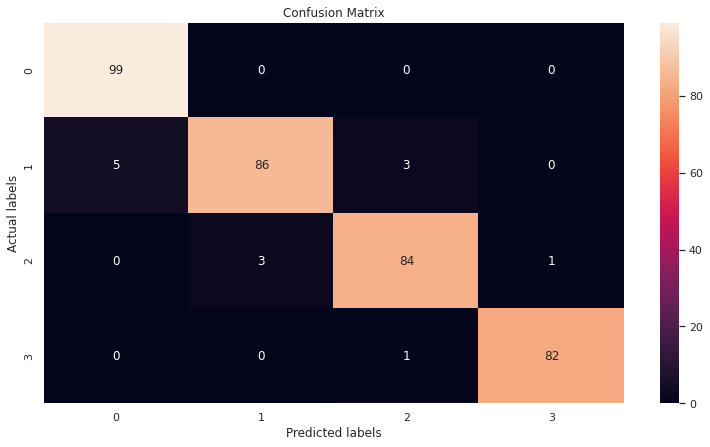

<Figure size 936x504 with 0 Axes>


 Classification report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        99
           1       0.97      0.91      0.94        94
           2       0.95      0.95      0.95        88
           3       0.99      0.99      0.99        83

    accuracy                           0.96       364
   macro avg       0.97      0.96      0.96       364
weighted avg       0.96      0.96      0.96       364



The top 5 rows of actual vs predicted labels
       Actual Label  Predicted Label
1985             3                3
1072             3                3
558              2                2
453              0                0
683              2                2


In [ ]:
# run the model
lr = logistic_regression(X,Y)

In [ ]:
# store the metrics of logistic regression
log_acc = lr[0]
log_precision = lr[1]
log_recall = lr[2]
log_roc = lr[3]

## **Building a Random Forest Model:**

In [ ]:
# function for random forest
def random_forest(X,Y):

  # split the data into train and test set
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
  print("The shape of training set is", X_train.shape, Y_train.shape)
  print("The shape of testing set is", X_test.shape, Y_test.shape)
  print("\n")

  # hyperparameters
  param_dict = {'n_estimators': [int(x) for x in np.linspace(100,300,3)],
              'max_depth': [int(x) for x in np.linspace(5,10,5)],
              'min_samples_split': [int(x) for x in np.linspace(5,15,3)],
              'min_samples_leaf': [int(x) for x in np.linspace(1,5,5)]}

  # build a random forest model
  rf_model = RandomForestClassifier()

  # random search
  rf_grid = RandomizedSearchCV(estimator=rf_model,
                       param_distributions= param_dict,
                       cv = 5, verbose=2, scoring='accuracy')

  rf_grid.fit(X_train,Y_train)

  print(rf_grid.best_estimator_)
  rf_optimal_model = rf_grid.best_estimator_
  print(rf_grid.best_params_)

  # get the predicted probabilities
  rf_train_prob = rf_optimal_model.predict_proba(X_train)
  rf_test_prob = rf_optimal_model.predict_proba(X_test)

  # get the predicted classes
  rf_train_class = rf_optimal_model.predict(X_train)
  rf_test_class = rf_optimal_model.predict(X_test)

  # calculating accuracy on train and test set
  rf_train_acc = accuracy_score(Y_train, rf_train_class)
  rf_test_acc = accuracy_score(Y_test, rf_test_class)

  print("\n")
  print("The accuracy on train dataset is", rf_train_acc)
  print("The accuracy on test dataset is", rf_test_acc)
  print("\n")

  # calculating precision and recall on the test set
  rf_precision = precision_score(Y_test, rf_test_class, average='weighted')
  print("The precision on test dataset is", rf_precision)

  rf_recall = recall_score(Y_test, rf_test_class, average='weighted')
  print("The recall on test dataset is", rf_recall)

  # calculating roc_auc_score on the test set
  rf_roc = roc_auc_score(Y_test, rf_test_prob, multi_class='ovo', average='weighted')
  print("The roc auc score on test dataset is", rf_roc)

  # training confusion matrix
  print("\n")
  print("Confusion matrix for train set:")
  matrix(Y_train, rf_train_class)
  plt.figure()
  plt.show()
  # testing confusion matrix
  print("\n Confusion matrix for test set:")
  matrix(Y_test, rf_test_class)
  plt.figure()
  plt.show()

  print("\n Classification report:")
  print(classification_report(Y_test, rf_test_class))
  print("\n")

  # prediction in a dataframe
  pred = pd.DataFrame({'Actual Label': Y_test,
                       'Predicted Label': rf_test_class})
  print("The top 5 rows of actual vs predicted labels\n", pred.head())

  # calculate the feature importances
  features = X_train.columns
  importances = rf_optimal_model.feature_importances_
  indices = np.argsort(importances)

  importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

  importance_df = pd.DataFrame(importance_dict)

  plt.figure(figsize=(15,25))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')
  plt.show()

  importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
  pd.set_option('display.max_columns', 200)
  pd.set_option('display.max_rows', 200)
  print(importance_df.sort_values(by=['Feature Importance'],ascending=False))

  return rf_test_acc, rf_precision, rf_recall, rf_roc

### **Evaluating the Model:**

The shape of training set is (1455, 20) (1455,)
The shape of testing set is (364, 20) (364,)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.4s
[CV] END max_depth=10, min_samples_l

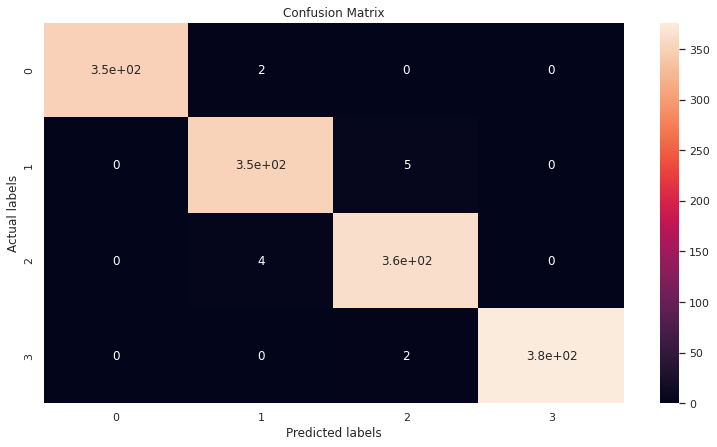

<Figure size 936x504 with 0 Axes>


 Confusion matrix for test set:
[[94  5  0  0]
 [ 4 81  9  0]
 [ 0 14 63 11]
 [ 0  0  8 75]]


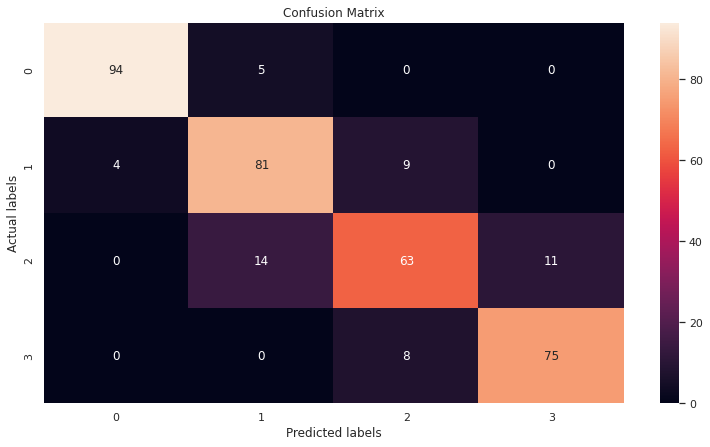

<Figure size 936x504 with 0 Axes>


 Classification report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        99
           1       0.81      0.86      0.84        94
           2       0.79      0.72      0.75        88
           3       0.87      0.90      0.89        83

    accuracy                           0.86       364
   macro avg       0.86      0.86      0.86       364
weighted avg       0.86      0.86      0.86       364



The top 5 rows of actual vs predicted labels
       Actual Label  Predicted Label
1985             3                3
1072             3                2
558              2                3
453              0                0
683              2                2


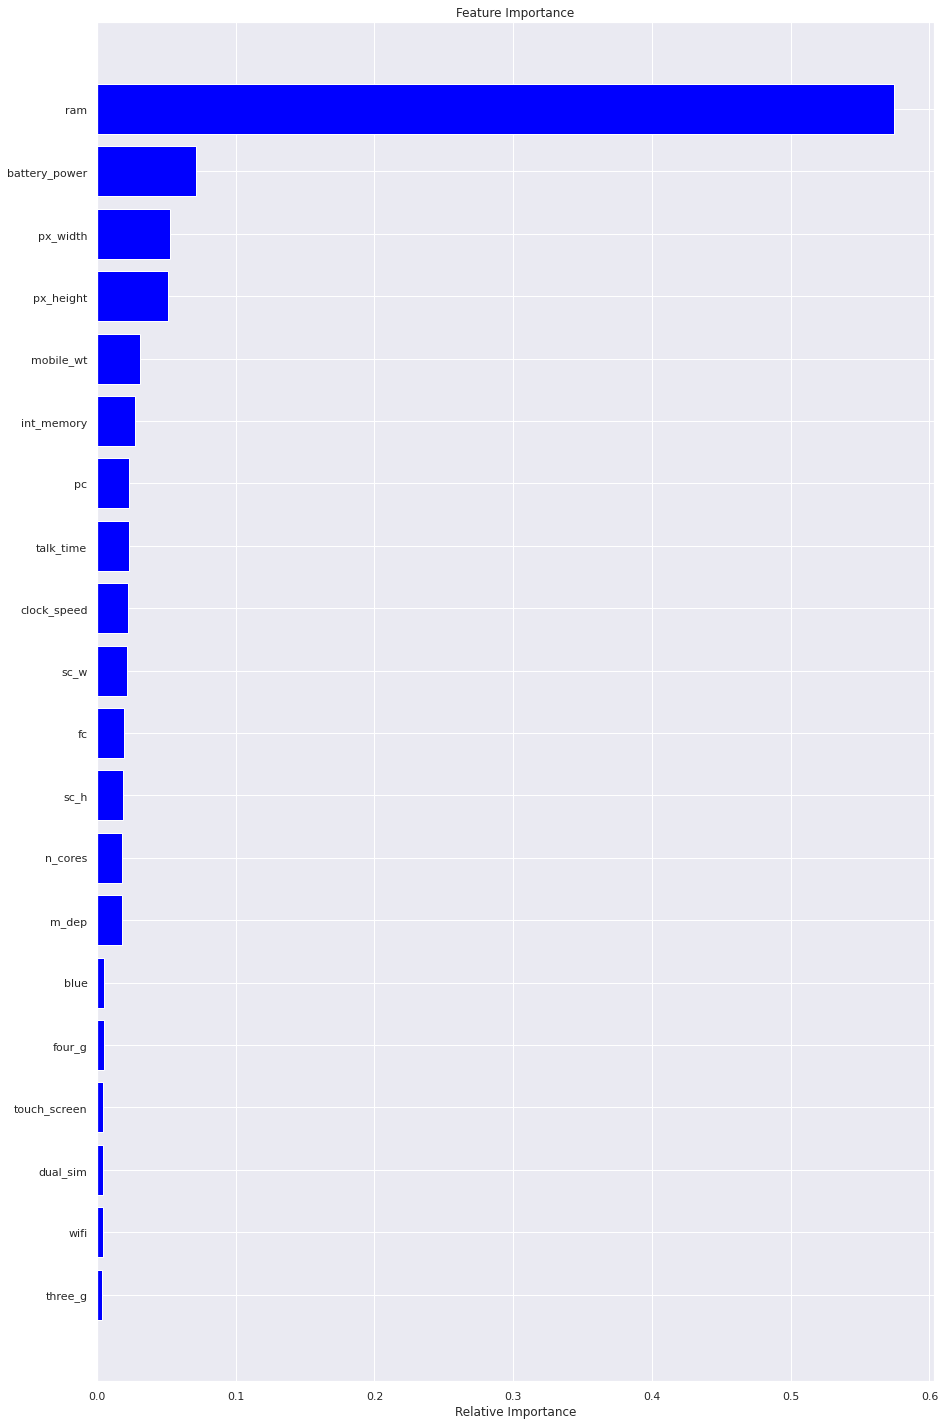

          Feature  Feature Importance
13            ram                0.57
0   battery_power                0.07
11      px_height                0.05
12       px_width                0.05
6      int_memory                0.03
8       mobile_wt                0.03
16      talk_time                0.02
15           sc_w                0.02
14           sc_h                0.02
10             pc                0.02
9         n_cores                0.02
7           m_dep                0.02
4              fc                0.02
2     clock_speed                0.02
1            blue                0.01
5          four_g                0.01
3        dual_sim                0.00
17        three_g                0.00
18   touch_screen                0.00
19           wifi                0.00


In [ ]:
# run the model
rf = random_forest(X,Y)

#### **Run the model again with the most important features:**

The shape of training set is (1455, 4) (1455,)
The shape of testing set is (364, 4) (364,)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   1.3s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   1.3s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   1.3s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   2.3s
[CV] END max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   1.3s
[CV] END max_depth=8, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.3s
[CV] END max_depth=8, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.4s
[CV] END max_depth=8, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.3s
[CV] END max_depth=8, min_samples_leaf

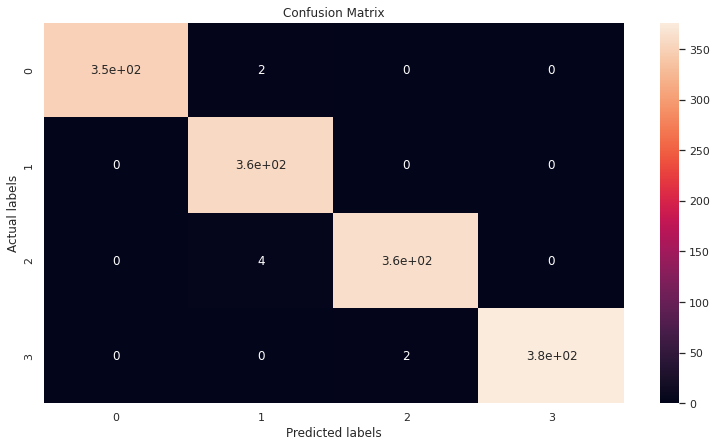

<Figure size 936x504 with 0 Axes>


 Confusion matrix for test set:
[[95  4  0  0]
 [ 2 87  5  0]
 [ 0  9 70  9]
 [ 0  0  9 74]]


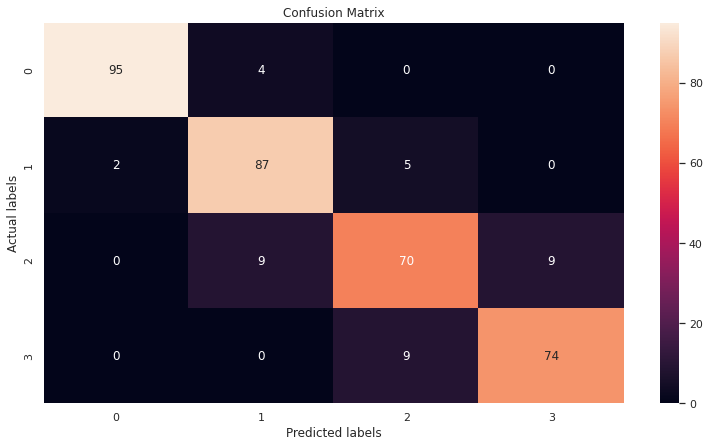

<Figure size 936x504 with 0 Axes>


 Classification report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        99
           1       0.87      0.93      0.90        94
           2       0.83      0.80      0.81        88
           3       0.89      0.89      0.89        83

    accuracy                           0.90       364
   macro avg       0.89      0.89      0.89       364
weighted avg       0.90      0.90      0.90       364



The top 5 rows of actual vs predicted labels
       Actual Label  Predicted Label
1985             3                3
1072             3                2
558              2                2
453              0                0
683              2                2


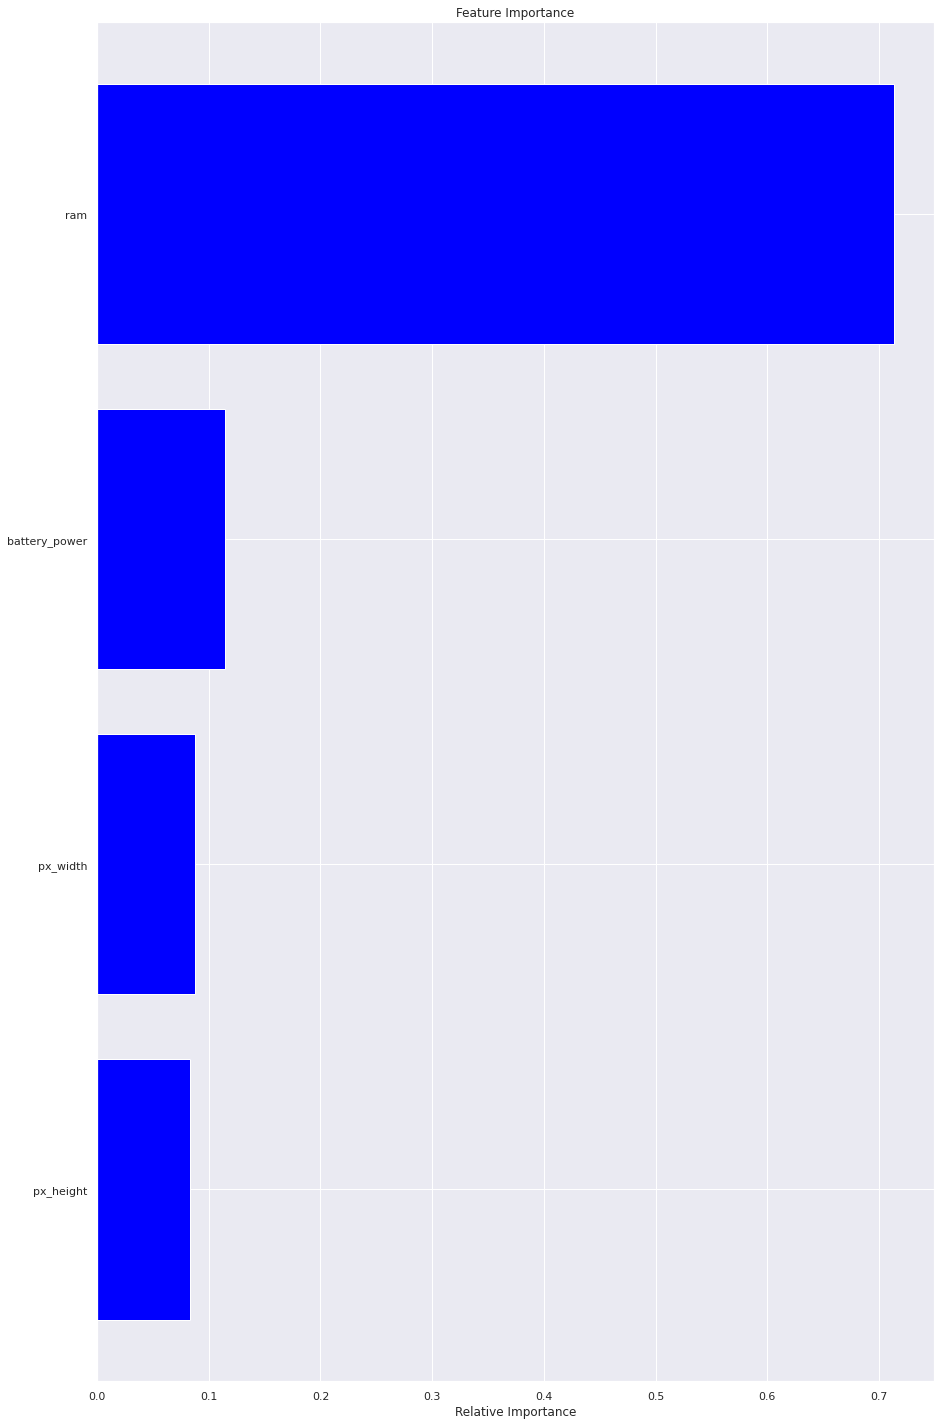

         Feature  Feature Importance
0            ram                0.71
1  battery_power                0.11
3       px_width                0.09
2      px_height                0.08


In [ ]:
# select the most important features for modeling
X_new = phone_df[['ram','battery_power','px_height', 'px_width']]
rf_new = random_forest(X_new,Y)

In [ ]:
# store the metrics of random forest
rf_acc = rf_new[0]
rf_precision = rf_new[1]
rf_recall = rf_new[2]
rf_roc = rf_new[3]

## **Building a Gradient Boosting Model:**

In [ ]:
# function for gradient boosting
def gradient_boosting(X,Y):

  # split the data into train and test set
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
  print("The shape of training set is", X_train.shape, Y_train.shape)
  print("The shape of testing set is", X_test.shape, Y_test.shape)
  print("\n")

  # hyperparameters
  param_dict = {'n_estimators': [int(x) for x in np.linspace(100,300,3)],
                'max_depth': [int(x) for x in np.linspace(5,10,5)],
                'min_samples_split': [int(x) for x in np.linspace(5,15,3)],
                'min_samples_leaf': [int(x) for x in np.linspace(1,5,5)],
                'learning_rate': [0.01,0.02,0.05,0.07,0.1]}

  # build a gradient boosting model
  gb_model = GradientBoostingClassifier()

  # random search
  gb_grid = RandomizedSearchCV(estimator=gb_model,
                       param_distributions = param_dict,
                       cv = 5, verbose=2, scoring='accuracy')

  gb_grid.fit(X_train,Y_train)

  print(gb_grid.best_estimator_)
  gb_optimal_model = gb_grid.best_estimator_
  print(gb_grid.best_params_)
  print("\n")

  # get the predicted probabilities
  gbm_train_prob = gb_optimal_model.predict_proba(X_train)
  gbm_test_prob = gb_optimal_model.predict_proba(X_test)

  # get the predicted classes
  gbm_train_class = gb_optimal_model.predict(X_train)
  gbm_test_class = gb_optimal_model.predict(X_test)

  # calculating accuracy on train and test set
  gbm_train_acc = accuracy_score(Y_train, gbm_train_class)
  gbm_test_acc = accuracy_score(Y_test, gbm_test_class)

  print("The accuracy on train set is", gbm_train_acc)
  print("The accuracy on test set is", gbm_test_acc)
  print("\n")

  # calculating precision and recall on the test set
  gb_precision = precision_score(Y_test, gbm_test_class, average='weighted')
  print("The precision on test dataset is", gb_precision)

  gb_recall = recall_score(Y_test, gbm_test_class, average='weighted')
  print("The recall on test dataset is", gb_recall)

  # calculating roc_auc_score on the test set
  gb_roc = roc_auc_score(Y_test, gbm_test_prob, multi_class='ovo', average='weighted')
  print("The roc auc score on test dataset is", gb_roc)

  # training confusion matrix
  print("\n")
  print("Confusion matrix for train set:")
  matrix(Y_train, gbm_train_class)
  plt.figure()
  plt.show()
  # testing confusion matrix
  print("\n Confusion matrix for test set:")
  matrix(Y_test, gbm_test_class)
  plt.figure()
  plt.show()

  print("\n Classification report:")
  print(classification_report(Y_test, gbm_test_class))
  print("\n")

  # prediction in a dataframe
  pred = pd.DataFrame({'Actual Label': Y_test,
                       'Predicted Label': gbm_test_class})
  print("The top 5 rows of actual vs predicted labels\n", pred.head())

  # calculate the feature importances
  features = X_train.columns
  importances = gb_optimal_model.feature_importances_
  indices = np.argsort(importances)

  importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

  importance_df = pd.DataFrame(importance_dict)

  plt.figure(figsize=(15,25))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')
  plt.show()

  importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
  pd.set_option('display.max_columns', 200)
  pd.set_option('display.max_rows', 200)
  print(importance_df.sort_values(by=['Feature Importance'],ascending=False))

  return gbm_test_acc, gb_precision, gb_recall, gb_roc

### **Evaluating the Model:**

The shape of training set is (1455, 20) (1455,)
The shape of testing set is (364, 20) (364,)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END learning_rate=0.05, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   8.2s
[CV] END learning_rate=0.05, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   8.3s
[CV] END learning_rate=0.05, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   9.3s
[CV] END learning_rate=0.05, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   8.2s
[CV] END learning_rate=0.05, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   8.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   5.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  

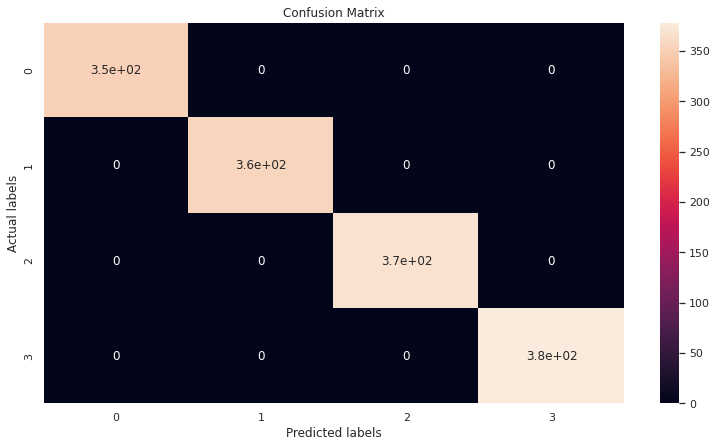

<Figure size 936x504 with 0 Axes>


 Confusion matrix for test set:
[[94  5  0  0]
 [ 6 84  4  0]
 [ 0  7 72  9]
 [ 0  0  8 75]]


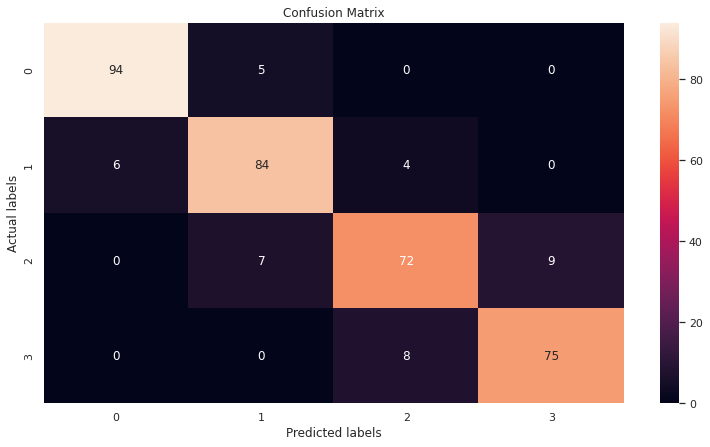

<Figure size 936x504 with 0 Axes>


 Classification report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94        99
           1       0.88      0.89      0.88        94
           2       0.86      0.82      0.84        88
           3       0.89      0.90      0.90        83

    accuracy                           0.89       364
   macro avg       0.89      0.89      0.89       364
weighted avg       0.89      0.89      0.89       364



The top 5 rows of actual vs predicted labels
       Actual Label  Predicted Label
1985             3                3
1072             3                2
558              2                2
453              0                0
683              2                2


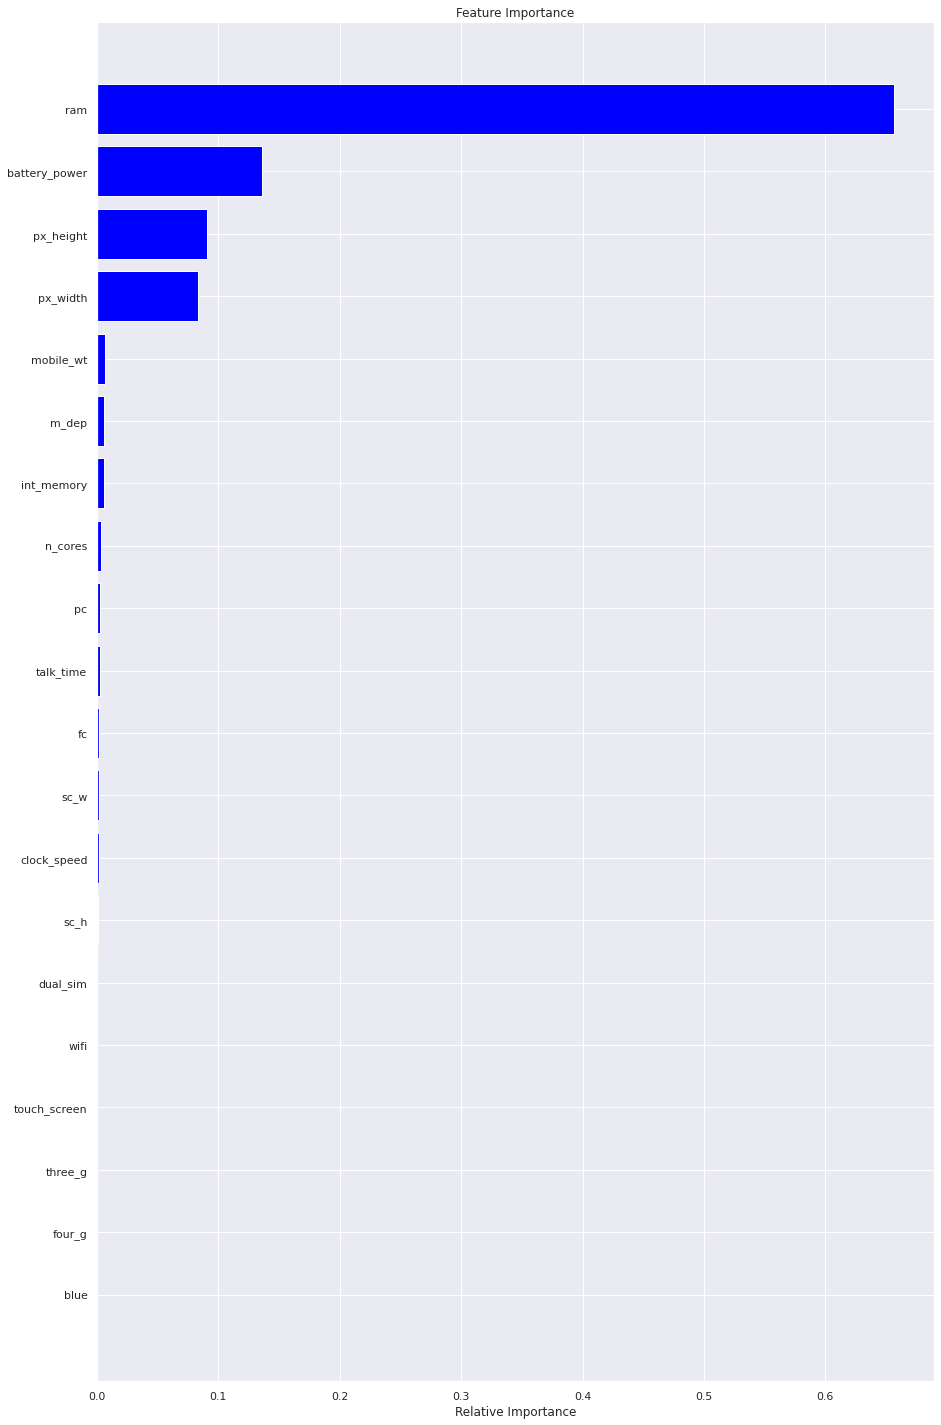

          Feature  Feature Importance
13            ram                0.66
0   battery_power                0.14
11      px_height                0.09
12       px_width                0.08
6      int_memory                0.01
7           m_dep                0.01
8       mobile_wt                0.01
18   touch_screen                0.00
17        three_g                0.00
16      talk_time                0.00
15           sc_w                0.00
14           sc_h                0.00
10             pc                0.00
1            blue                0.00
9         n_cores                0.00
5          four_g                0.00
4              fc                0.00
3        dual_sim                0.00
2     clock_speed                0.00
19           wifi                0.00


In [ ]:
# run the model
gbm = gradient_boosting(X,Y)

#### **Run the model again with the most important features:**

The shape of training set is (1455, 4) (1455,)
The shape of testing set is (364, 4) (364,)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END learning_rate=0.05, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   6.6s
[CV] END learning_rate=0.05, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   6.6s
[CV] END learning_rate=0.05, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   6.7s
[CV] END learning_rate=0.05, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   6.6s
[CV] END learning_rate=0.05, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   6.7s
[CV] END learning_rate=0.07, max_depth=8, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   2.5s
[CV] END learning_rate=0.07, max_depth=8, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   2.5s
[CV] E

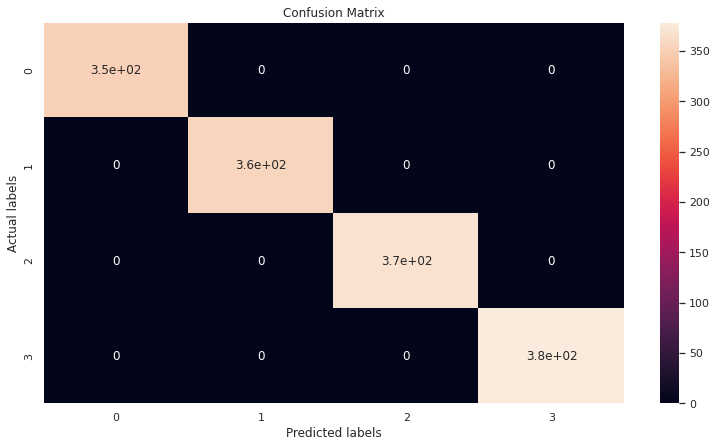

<Figure size 936x504 with 0 Axes>


 Confusion matrix for test set:
[[90  9  0  0]
 [ 6 84  4  0]
 [ 0  8 69 11]
 [ 0  0 11 72]]


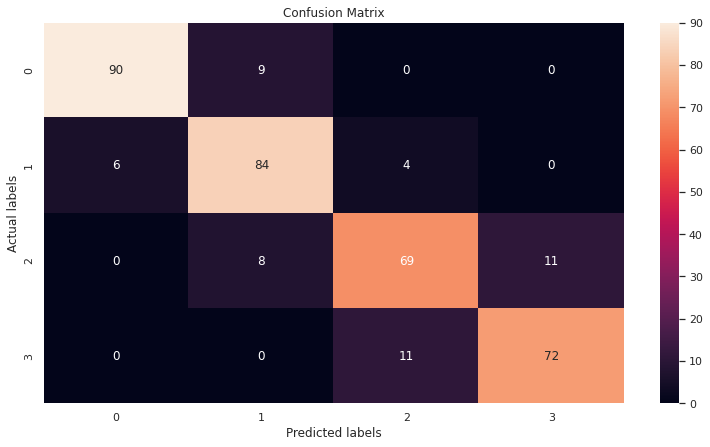

<Figure size 936x504 with 0 Axes>


 Classification report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        99
           1       0.83      0.89      0.86        94
           2       0.82      0.78      0.80        88
           3       0.87      0.87      0.87        83

    accuracy                           0.87       364
   macro avg       0.86      0.86      0.86       364
weighted avg       0.87      0.87      0.87       364



The top 5 rows of actual vs predicted labels
       Actual Label  Predicted Label
1985             3                3
1072             3                2
558              2                3
453              0                0
683              2                2


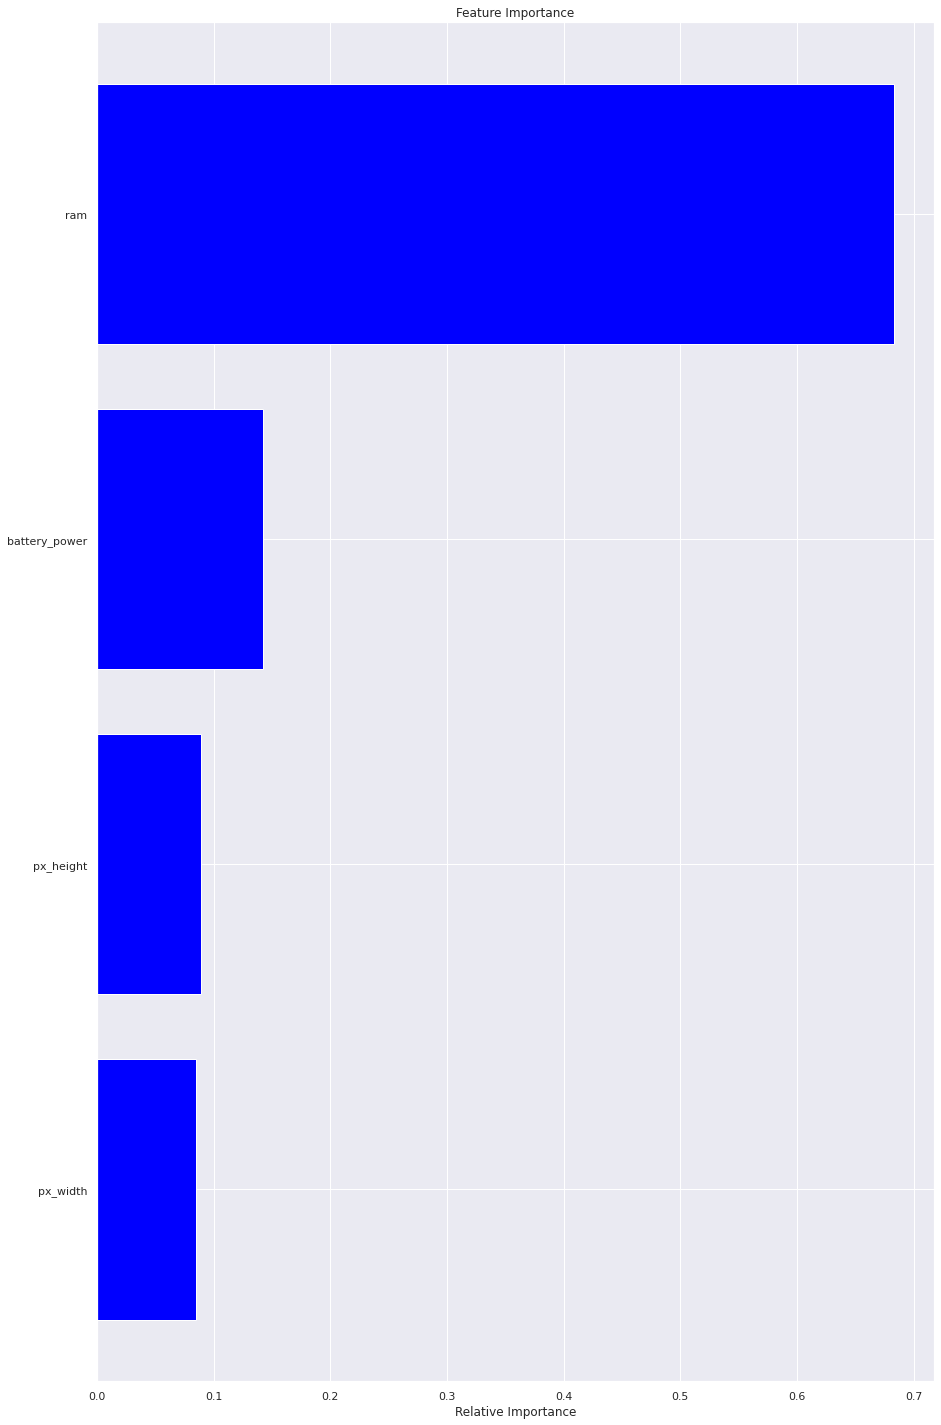

         Feature  Feature Importance
0            ram                0.68
1  battery_power                0.14
2      px_height                0.09
3       px_width                0.08


In [ ]:
# select the most important features for modeling
X_new = phone_df[['ram','battery_power','px_height','px_width']]
gbm_new = gradient_boosting(X_new,Y)

In [ ]:
# store the metrics of gradient boosting
gb_acc = gbm[0]
gb_precision = gbm[1]
gb_recall = gbm[2]
gb_roc = gbm[3]

## **Building a XG Boost Model:**

In [ ]:
# function for xgboost
def xg_boost(X,Y):

  # split the data into train and test set
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
  print("The shape of training set is", X_train.shape, Y_train.shape)
  print("The shape of testing set is", X_test.shape, Y_test.shape)
  print("\n")

  # hyperparameters
  param_dict = {'n_estimators': [int(x) for x in np.linspace(100,300,3)],
                'max_depth': [int(x) for x in np.linspace(5,10,5)],
                'min_samples_split': [int(x) for x in np.linspace(5,15,3)],
                'min_samples_leaf': [int(x) for x in np.linspace(1,5,5)],
                'learning_rate': [0.01,0.02,0.05,0.07,0.1]}

  # build a xgboost model
  xgb_model = XGBClassifier()

  # random search
  xgb_grid = RandomizedSearchCV(estimator=xgb_model,
                       param_distributions = param_dict,
                       cv = 5, verbose=2, scoring='accuracy')

  xgb_grid.fit(X_train,Y_train)

  print(xgb_grid.best_estimator_)
  xgb_optimal_model = xgb_grid.best_estimator_
  print(xgb_grid.best_params_)
  print("\n")

  # get the predicted probabilities
  xgb_train_prob = xgb_optimal_model.predict_proba(X_train)
  xgb_test_prob = xgb_optimal_model.predict_proba(X_test)

  # get the predicted classes
  xgb_train_class = xgb_optimal_model.predict(X_train)
  xgb_test_class = xgb_optimal_model.predict(X_test)

  # calculating accuracy on train and test set
  xgb_train_acc = accuracy_score(Y_train, xgb_train_class)
  xgb_test_acc = accuracy_score(Y_test, xgb_test_class)

  print("The accuracy on train set is", xgb_train_acc)
  print("The accuracy on test set is", xgb_test_acc)
  print("\n")

  # calculating precision and recall on the test set
  xgb_precision = precision_score(Y_test, xgb_test_class, average='weighted')
  print("The precision on test dataset is", xgb_precision)

  xgb_recall = recall_score(Y_test, xgb_test_class, average='weighted')
  print("The recall on test dataset is", xgb_recall)

  # calculating roc_auc_score on the test set
  xgb_roc = roc_auc_score(Y_test, xgb_test_prob, multi_class='ovo', average='weighted')
  print("The roc auc score on test dataset is", xgb_roc)

  # training confusion matrix
  print("\n")
  print("Confusion matrix for train set:")
  matrix(Y_train, xgb_train_class)
  plt.figure()
  plt.show()
  # testing confusion matrix
  print("\n Confusion matrix for test set:")
  matrix(Y_test, xgb_test_class)
  plt.figure()
  plt.show()

  print("\n Classification report:")
  print(classification_report(Y_test, xgb_test_class))
  print("\n")

  # prediction in a dataframe
  pred = pd.DataFrame({'Actual Label': Y_test,
                       'Predicted Label': xgb_test_class})
  print("The top 5 rows of actual vs predicted labels\n", pred.head())

  # calculate the feature importances
  features = X_train.columns
  importances = xgb_optimal_model.feature_importances_
  indices = np.argsort(importances)

  importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

  importance_df = pd.DataFrame(importance_dict)

  plt.figure(figsize=(15,25))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')
  plt.show()

  importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
  pd.set_option('display.max_columns', 200)
  pd.set_option('display.max_rows', 200)
  print(importance_df.sort_values(by=['Feature Importance'],ascending=False))

  return xgb_test_acc, xgb_precision, xgb_recall, xgb_roc

### **Evaluating the Model:**

The shape of training set is (1455, 20) (1455,)
The shape of testing set is (364, 20) (364,)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END learning_rate=0.01, max_depth=8, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   3.1s
[CV] END learning_rate=0.01, max_depth=8, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   3.1s
[CV] END learning_rate=0.01, max_depth=8, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   3.1s
[CV] END learning_rate=0.01, max_depth=8, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   3.1s
[CV] END learning_rate=0.01, max_depth=8, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   3.1s
[CV] END learning_rate=0.07, max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   1.7s
[CV] END learning_rate=0.07, max_depth=8, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   1.7s
[C

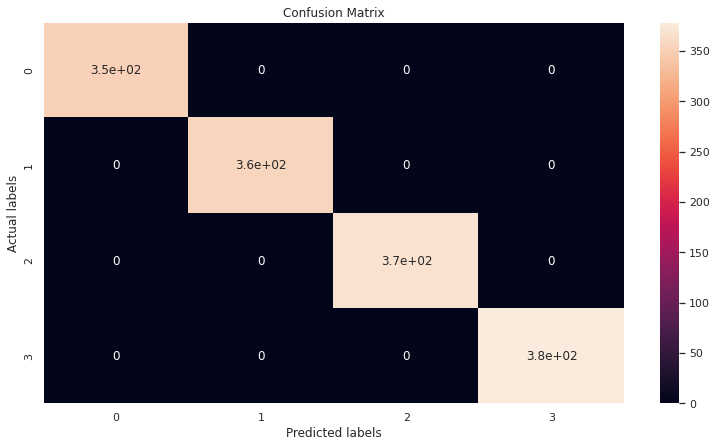

<Figure size 936x504 with 0 Axes>


 Confusion matrix for test set:
[[94  5  0  0]
 [ 4 85  5  0]
 [ 0  8 72  8]
 [ 0  0 10 73]]


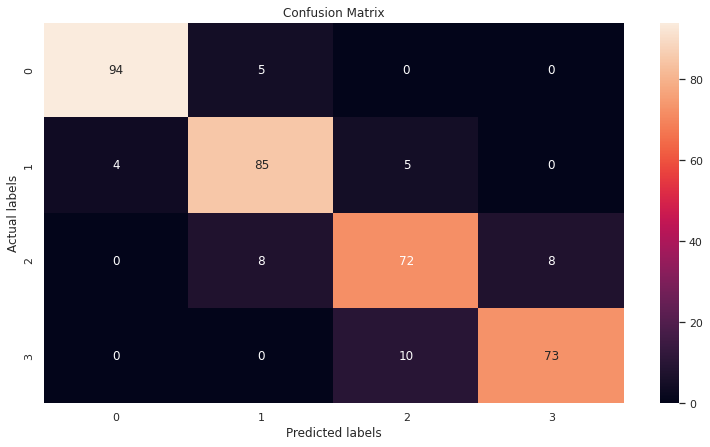

<Figure size 936x504 with 0 Axes>


 Classification report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        99
           1       0.87      0.90      0.89        94
           2       0.83      0.82      0.82        88
           3       0.90      0.88      0.89        83

    accuracy                           0.89       364
   macro avg       0.89      0.89      0.89       364
weighted avg       0.89      0.89      0.89       364



The top 5 rows of actual vs predicted labels
       Actual Label  Predicted Label
1985             3                3
1072             3                2
558              2                2
453              0                0
683              2                2


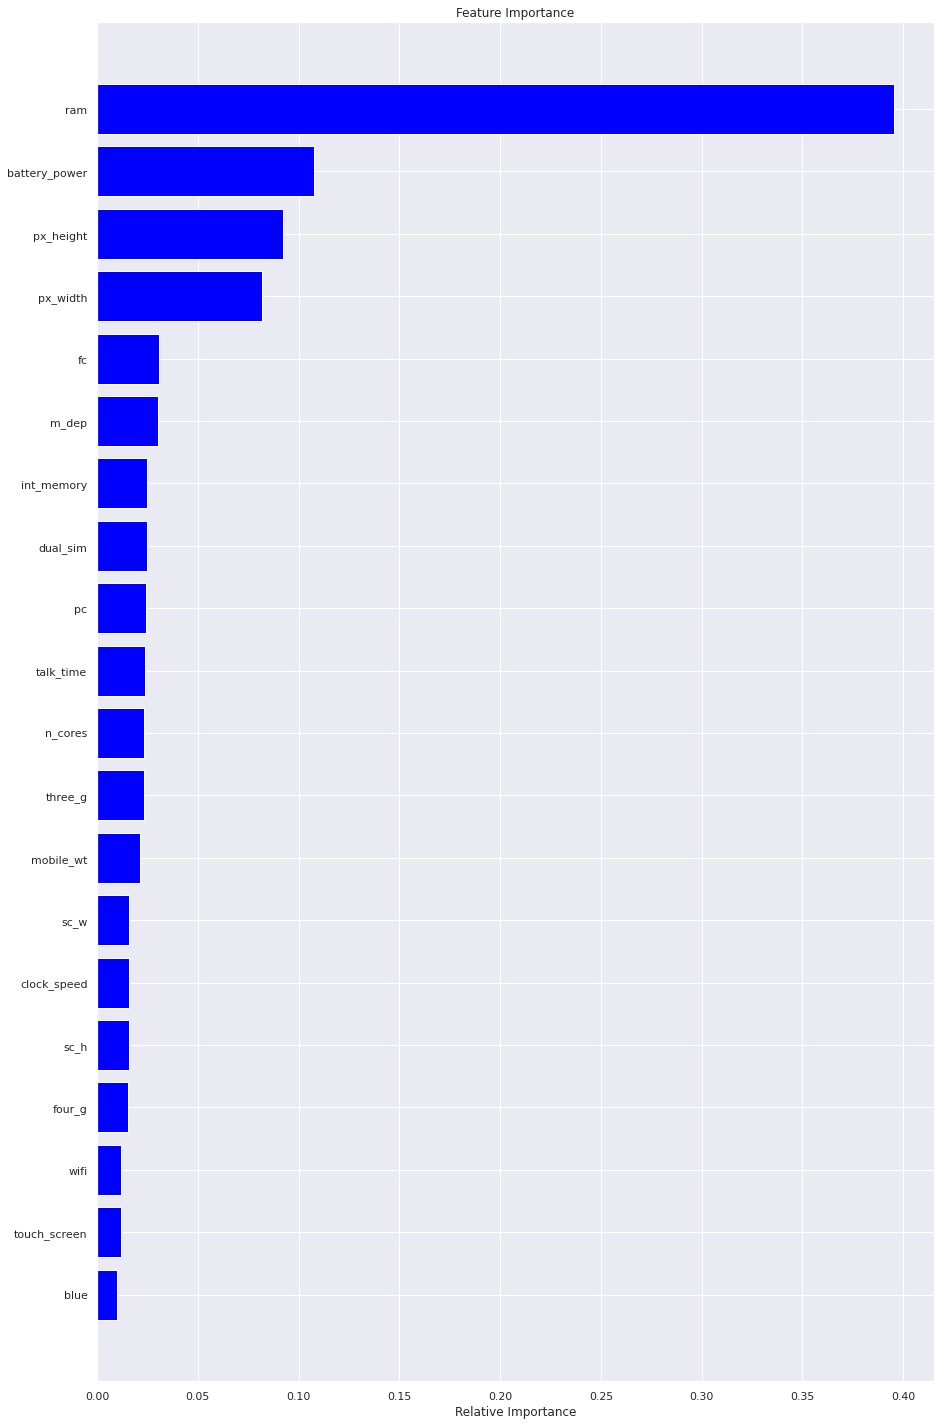

          Feature  Feature Importance
13            ram                0.40
0   battery_power                0.11
11      px_height                0.09
12       px_width                0.08
4              fc                0.03
7           m_dep                0.03
17        three_g                0.02
16      talk_time                0.02
15           sc_w                0.02
14           sc_h                0.02
10             pc                0.02
9         n_cores                0.02
8       mobile_wt                0.02
6      int_memory                0.02
5          four_g                0.02
3        dual_sim                0.02
2     clock_speed                0.02
1            blue                0.01
18   touch_screen                0.01
19           wifi                0.01


In [ ]:
# run the model
xgb = xg_boost(X,Y)

#### **Run the model again with the most important features:**

The shape of training set is (1455, 4) (1455,)
The shape of testing set is (364, 4) (364,)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   1.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   1.0s
[

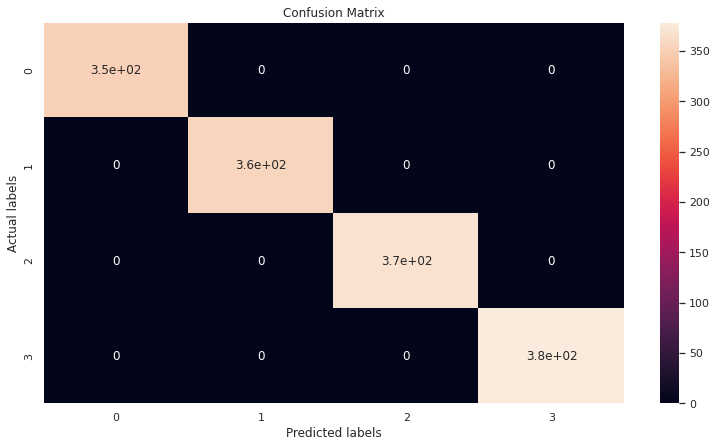

<Figure size 936x504 with 0 Axes>


 Confusion matrix for test set:
[[95  4  0  0]
 [ 3 85  6  0]
 [ 0  6 76  6]
 [ 0  0  9 74]]


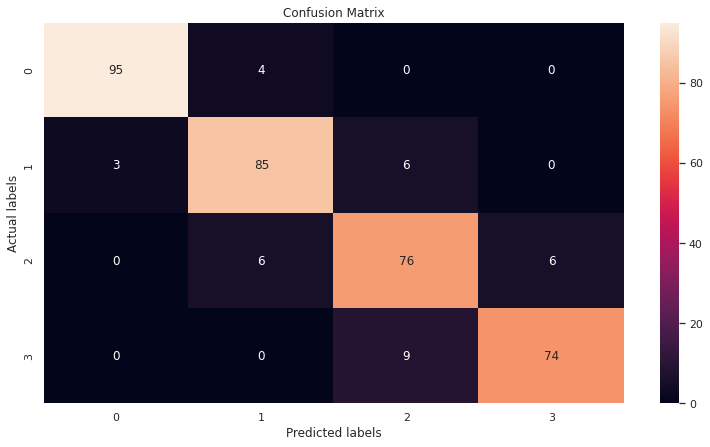

<Figure size 936x504 with 0 Axes>


 Classification report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        99
           1       0.89      0.90      0.90        94
           2       0.84      0.86      0.85        88
           3       0.93      0.89      0.91        83

    accuracy                           0.91       364
   macro avg       0.91      0.90      0.91       364
weighted avg       0.91      0.91      0.91       364



The top 5 rows of actual vs predicted labels
       Actual Label  Predicted Label
1985             3                3
1072             3                2
558              2                2
453              0                0
683              2                2


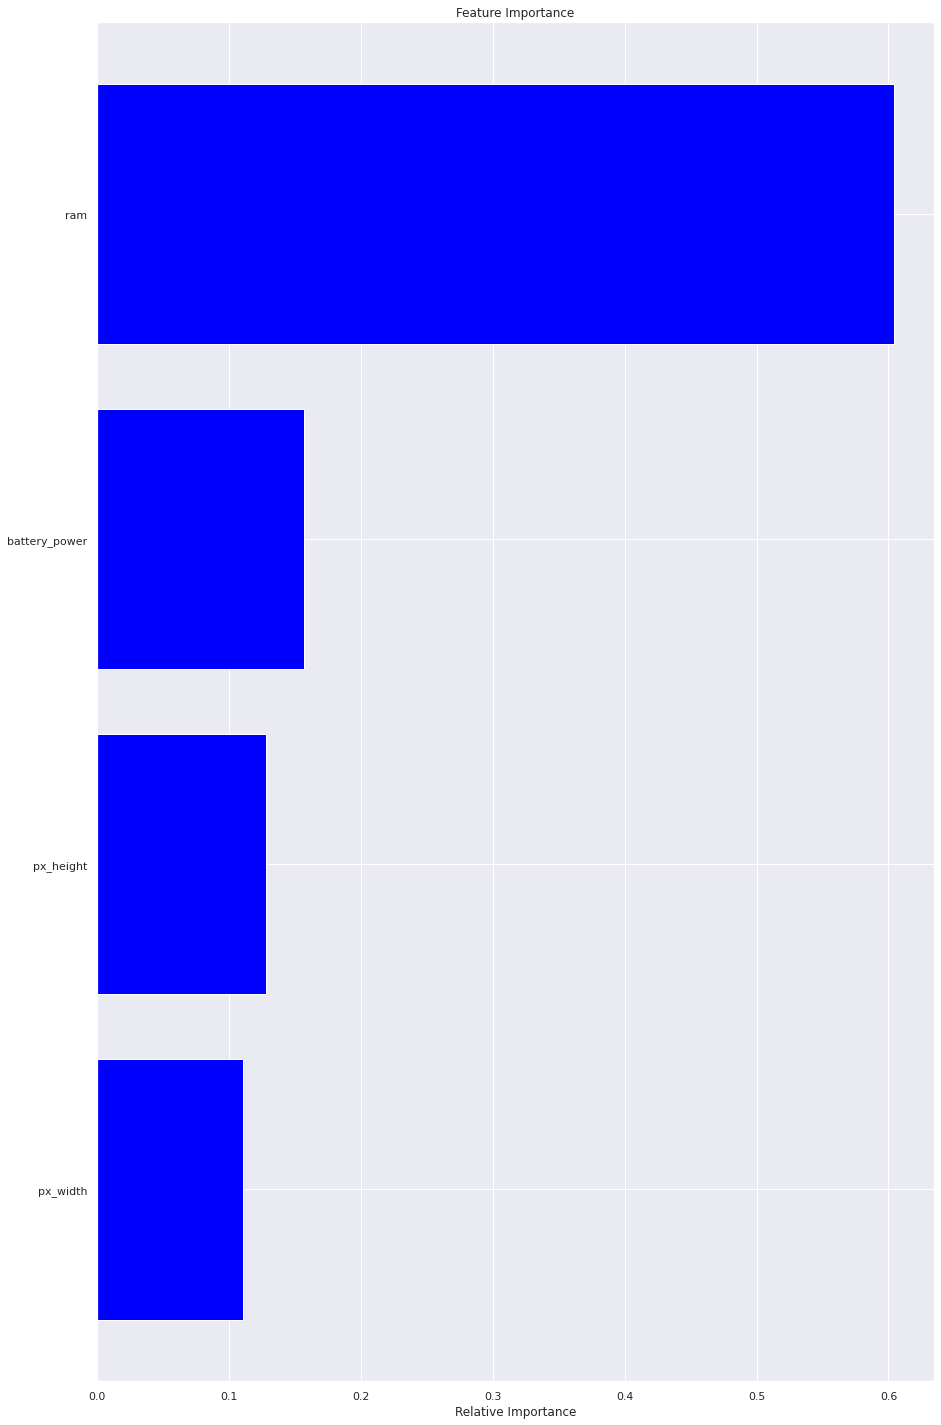

         Feature  Feature Importance
0            ram                0.60
1  battery_power                0.16
2      px_height                0.13
3       px_width                0.11


In [ ]:
# select the most important features for modeling
X_new = phone_df[['ram','battery_power','px_height','px_width']]
xgb_new = xg_boost(X_new,Y)

In [ ]:
# store the metrics of xgboost
xgb_acc = xgb_new[0]
xgb_precision = xgb_new[1]
xgb_recall = xgb_new[2]
xgb_roc = xgb_new[3]

## **Building a KNN Model:**

In [ ]:
# function for knn classifier
def knn(X,Y):

  # split the data into train and test set
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
  print("The shape of training set is", X_train.shape, Y_train.shape)
  print("The shape of testing set is", X_test.shape, Y_test.shape)
  print("\n")

  # hyperparameters
  param_dict = {'n_neighbors': [3],
                'leaf_size': [25]}

  # build a xgboost model
  knn_model = KNeighborsClassifier()

  # random search
  knn_grid = RandomizedSearchCV(estimator=knn_model,
                       param_distributions = param_dict,
                       cv = 5, verbose=2, scoring='accuracy')

  knn_grid.fit(X_train,Y_train)

  print(knn_grid.best_estimator_)
  knn_optimal_model = knn_grid.best_estimator_
  print(knn_grid.best_params_)
  print("\n")

  # get the predicted probabilities
  knn_train_prob = knn_optimal_model.predict_proba(X_train)
  knn_test_prob = knn_optimal_model.predict_proba(X_test)

  # get the predicted classes
  knn_train_class = knn_optimal_model.predict(X_train)
  knn_test_class = knn_optimal_model.predict(X_test)

  # calculating accuracy on train and test set
  knn_train_acc = accuracy_score(Y_train, knn_train_class)
  knn_test_acc = accuracy_score(Y_test, knn_test_class)

  print("The accuracy on train set is", knn_train_acc)
  print("The accuracy on test set is", knn_test_acc)
  print("\n")

  # calculating precision and recall on the test set
  knn_precision = precision_score(Y_test, knn_test_class, average='weighted')
  print("The precision on test dataset is", knn_precision)

  knn_recall = recall_score(Y_test, knn_test_class, average='weighted')
  print("The recall on test dataset is", knn_recall)

  # calculating roc_auc_score on the test set
  knn_roc = roc_auc_score(Y_test, knn_test_prob, multi_class='ovo', average='weighted')
  print("The roc auc score on test dataset is", knn_roc)

  # training confusion matrix
  print("\n")
  print("Confusion matrix for train set:")
  matrix(Y_train, knn_train_class)
  plt.figure()
  plt.show()
  # testing confusion matrix
  print("\n Confusion matrix for test set:")
  matrix(Y_test, knn_test_class)
  plt.figure()
  plt.show()

  print("\n Classification report:")
  print(classification_report(Y_test, knn_test_class))
  print("\n")

  # prediction in a dataframe
  pred = pd.DataFrame({'Actual Label': Y_test,
                       'Predicted Label': knn_test_class})
  print("The top 5 rows of actual vs predicted labels\n", pred.head())

  return knn_test_acc, knn_precision, knn_recall, knn_roc

### **Evaluating the Model:**

The shape of training set is (1455, 20) (1455,)
The shape of testing set is (364, 20) (364,)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ........................leaf_size=25, n_neighbors=3; total time=   0.0s
[CV] END ........................leaf_size=25, n_neighbors=3; total time=   0.0s
[CV] END ........................leaf_size=25, n_neighbors=3; total time=   0.0s
[CV] END ........................leaf_size=25, n_neighbors=3; total time=   0.0s
[CV] END ........................leaf_size=25, n_neighbors=3; total time=   0.0s
KNeighborsClassifier(leaf_size=25, n_neighbors=3)
{'n_neighbors': 3, 'leaf_size': 25}


The accuracy on train set is 0.9608247422680413
The accuracy on test set is 0.9175824175824175


The precision on test dataset is 0.9175824175824175
The recall on test dataset is 0.9175824175824175
The roc auc score on test dataset is 0.9775698063116353


Confusion matrix for train set:
[[345   7   0   0]
 [  5 345   7   0]
 [  0  12 346  10]
 [  0   

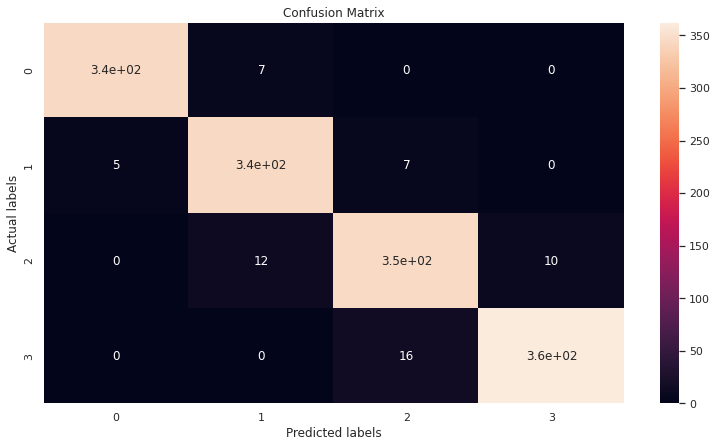

<Figure size 936x504 with 0 Axes>


 Confusion matrix for test set:
[[94  5  0  0]
 [ 5 85  4  0]
 [ 0  4 78  6]
 [ 0  0  6 77]]


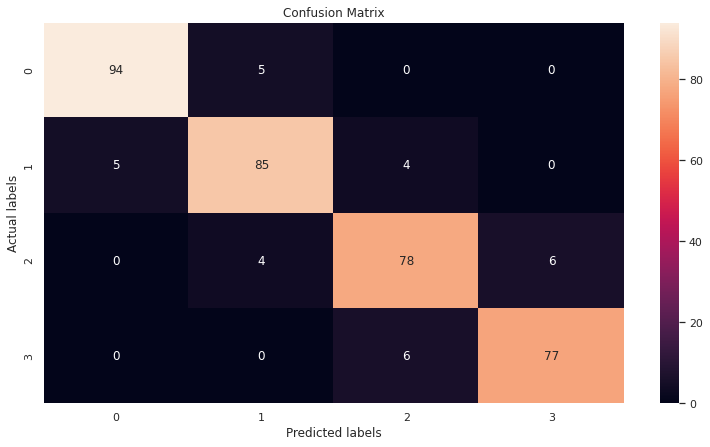

<Figure size 936x504 with 0 Axes>


 Classification report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        99
           1       0.90      0.90      0.90        94
           2       0.89      0.89      0.89        88
           3       0.93      0.93      0.93        83

    accuracy                           0.92       364
   macro avg       0.92      0.92      0.92       364
weighted avg       0.92      0.92      0.92       364



The top 5 rows of actual vs predicted labels
       Actual Label  Predicted Label
1985             3                3
1072             3                3
558              2                2
453              0                1
683              2                2


In [ ]:
# run the model
knn = knn(X,Y)

In [ ]:
# store the metrics of KNN
knn_acc = knn[0]
knn_precision = knn[1]
knn_recall = knn[2]
knn_roc = knn[3]

## **Building a SVM Model:**

In [ ]:
# function for svm classifier
def SVM(X,Y):

  # split the data into train and test set
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
  print("The shape of training set is", X_train.shape, Y_train.shape)
  print("The shape of testing set is", X_test.shape, Y_test.shape)
  print("\n")

  # hyperparameters
  param_dict = {'C': [0.01,0.1,1,10,100],
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf','poly','sigmoid']}

  # build a svm model
  svm_model = SVC(decision_function_shape='ovo', probability=True)

  # random search
  svm_grid = RandomizedSearchCV(estimator = svm_model,
                              param_distributions = param_dict,
                              cv = 5, verbose = 2, scoring = 'accuracy')

  svm_grid.fit(X_train, Y_train)

  print(svm_grid.best_estimator_)
  svm_optimal_model = svm_grid.best_estimator_
  print(svm_grid.best_params_)

  # get the predicted probabilities
  svm_train_prob = svm_optimal_model.predict_proba(X_train)
  svm_test_prob = svm_optimal_model.predict_proba(X_test)

  # get the predicted classes
  svm_train_class = svm_optimal_model.predict(X_train)
  svm_test_class = svm_optimal_model.predict(X_test)

  # calculating accuracy on train and test set
  svm_train_acc = accuracy_score(Y_train, svm_train_class)
  svm_test_acc = accuracy_score(Y_test, svm_test_class)

  print("The accuracy on train set is", svm_train_acc)
  print("The accuracy on test set is", svm_test_acc)
  print("\n")

  # calculating precision and recall on the test set
  svm_precision = precision_score(Y_test, svm_test_class, average='weighted')
  print("The precision on test set is", svm_precision)

  svm_recall = recall_score(Y_test, svm_test_class, average='weighted')
  print("The recall on test set is", svm_recall)

  # calculating roc_auc_score on the test set
  svm_roc = roc_auc_score(Y_test, svm_test_prob, multi_class='ovo', average='weighted')
  print("The roc auc score on test set is", svm_roc)

  # training confusion matrix
  print("\n")
  print("Confusion matrix for train set:")
  matrix(Y_train, svm_train_class)
  plt.figure()
  plt.show()
  # testing confusion matrix
  print("\n Confusion matrix for test set:")
  matrix(Y_test, svm_test_class)
  plt.figure()
  plt.show()

  print("\n Classification report:")
  print(classification_report(Y_test, svm_test_class))
  print("\n")

  # prediction in a dataframe
  pred = pd.DataFrame({'Actual Label': Y_test,
                       'Predicted Label': svm_test_class})
  print("The top 5 rows of actual vs predicted labels\n", pred.head())

  return svm_test_acc, svm_precision, svm_recall, svm_roc

### **Evaluating the Model:**

The shape of training set is (1455, 20) (1455,)
The shape of testing set is (364, 20) (364,)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.7s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END .......................C=

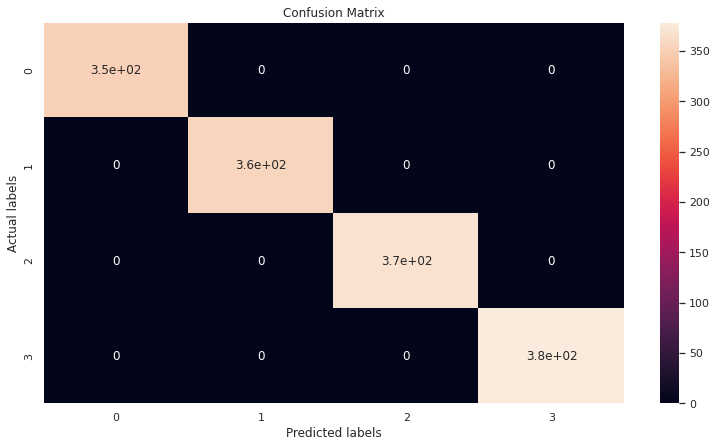

<Figure size 936x504 with 0 Axes>


 Confusion matrix for test set:
[[99  0  0  0]
 [ 2 89  3  0]
 [ 0  2 82  4]
 [ 0  0  3 80]]


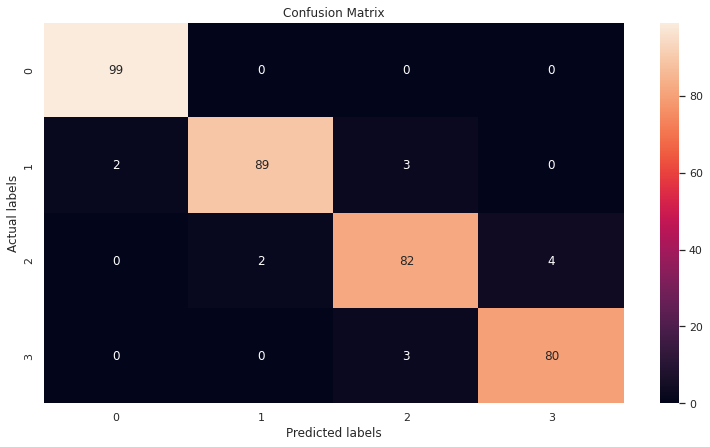

<Figure size 936x504 with 0 Axes>


 Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        99
           1       0.98      0.95      0.96        94
           2       0.93      0.93      0.93        88
           3       0.95      0.96      0.96        83

    accuracy                           0.96       364
   macro avg       0.96      0.96      0.96       364
weighted avg       0.96      0.96      0.96       364



The top 5 rows of actual vs predicted labels
       Actual Label  Predicted Label
1985             3                3
1072             3                3
558              2                2
453              0                0
683              2                2


In [ ]:
# run the model
svm = SVM(X,Y)

In [ ]:
# store the metrics of SVM
svm_acc = svm[0]
svm_precision = svm[1]
svm_recall = svm[2]
svm_roc = svm[3]

## **Now, let us compare all our models:**

In [ ]:
# a dataframe to compare all the models
models_df = pd.DataFrame(
    {'Models': ['Logistic Regression','Random Forest','Gradient Boosting','XG Boost','KNN','SVM'],
     'Accuracy': [log_acc, rf_acc, gb_acc, xgb_acc, knn_acc, svm_acc],
     'Precision': [log_precision, rf_precision, gb_precision, xgb_precision, knn_precision, svm_precision],
     'Recall': [log_recall, rf_recall, gb_recall, xgb_recall, knn_recall, svm_recall],
     'ROC AUC': [log_roc, rf_roc, gb_roc, xgb_roc, knn_roc, svm_roc]}
)
models_df.sort_values(by=['Accuracy'], ascending=False, inplace=True)
models_df

,Models,Accuracy,Precision,Recall,ROC AUC
0,Logistic Regression,0.964286,0.964483,0.964286,0.997546
5,SVM,0.961538,0.961597,0.961538,0.998676
4,KNN,0.917582,0.917582,0.917582,0.977570
3,XG Boost,0.906593,0.907539,0.906593,0.990938
1,Random Forest,0.895604,0.895802,0.895604,0.988796
2,Gradient Boosting,0.892857,0.892433,0.892857,0.987880


* Logistic Regression performs the best followed by SVM among the six classification methods used.

### **Visualizing the accuracy for all the models:**

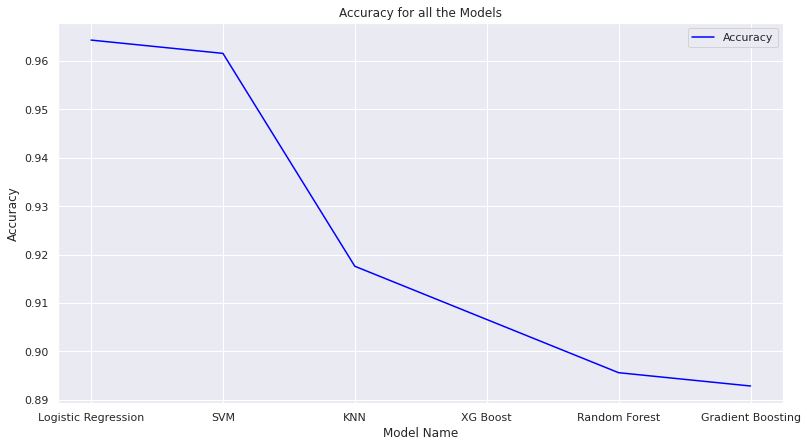

In [ ]:
# plot the accuracy of all the models
plt.figure(figsize=(13,7))
ax = plt.gca()
models_df.plot(kind='line', x='Models', y='Accuracy', color='blue', ax=ax)
plt.title('Accuracy for all the Models')
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.show()

## **<u>Conclusion:</u>**

#### We have reached the end of our mobile price range prediction project and have achieved a fairly good result for all the models implemented. We have discovered a lot of insights from the data through EDA which helps in determining which features will have a strong influence on the price range prediction.

#### This kind of prediction is very important for businesses to understand which factors drive the price of a mobile phone and estimate the price of mobile phones accurately to give good competition to other manufacturers.

#### Let us summarize the whole work in few points below:

* The dataset contains 2000 records of mobile phone information with 21 features. There are 6 categorical features and 14 numerical features with price range as the target variable.

* The dataset was almost a cleaned one with no null values present or duplicate records found. Few features like pixel resolution height and screen width had zero values in few records which had to be removed before proceeding further.

* EDA was used to generate insights or to get all sorts of information of the features in the dataset. With the help of EDA, we got to know that

  * The target class data was mostly balanced with not much difference between each class.

  * Most of the categorical features had a similar distribution or count except the feature 'three_g'. There were very few records for mobile phones which doesn't support 3G. We can infer that almost all phones had 3G network access if not 4G.

  * Most of the numerical features follow an uniform distribution except few features like front camera, pixel resolution height and screen width which had a right skewed distribution.

  * The boxplots suggested us that there are few outliers in two features but we know that these values are very natural in real life, thus we didn't treat them as outliers.

  * Almost all categorical features had a similar distribution across all price ranges except 'three_g' where there were very few records of mobile phones not having 3G network access across all price ranges.

  * There is a slight increase in count for each feature in the very high cost category except the feature touch screen.

  * We can infer that the more we pay, more choices we get for mobile phones with all the features.

  * Battery power and RAM increases with the increase in price range and thus these two features will be an influential factor for predicting the price range.

  * Most of the other numerical features doesn't show a significant change with the price range.

* Through correlation analysis we got to know that,

  * RAM is the only feature which is strongly correlated with the target variable.

  * Most of the other independent variables were not strongly correlated to each other and hence we didn't need to remove or combine any feature.

  * Through correlation plots we have observed that except RAM, battery power, px_height and px_width are slightly correlated with the target variable and can be important features to determine the price ranges.

  * No categorical feature is strongly correlated with the target variable and interestingly touch screen had a low negative correlation with the target variable.

* We have implemented 6 classification models and have achieved a fairly good result for all the algorithms.

  * Logistic Regression
  * Random Forest
  * Gradient Boosting
  * XG Boost
  * K Nearest Neighbors
  * Support Vector Machines

* All the models have achieved an approx accuracy of 90% which shows that the data were properly classified.

* Logistic Regression and SVM has performed better than any other model by achieving an accuracy of 96% which is the highest among the 6 models implemented.

* Through the tree based methods we found out that RAM, battery power, px_height and px_width are the most important features for the prediction of price ranges.

* The tree based methods have performed poorly in comparison to the other classification methods.